# homework4
## 邹烨 15210130105

In [ ]:
with open('/Users/zouye/cjc2016/data/gov_reports1954-2016.txt', 'r') as f:
    reports = f.readlines()

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
len(reports)

47

In [4]:
print reports[32][:1000]


2002	2002年政府工作报告　　——2002年3月5日在第九届全国人民代表大会第五次会议上		　　　　　　　　　　　　　　　　　　 国务院总理朱镕基　  各位代表：　　现在，我代表国务院向大会作政府工作报告，请予审议，并请全国政协各位委员提出意见。　　首先报告２００１年的工作。　　新世纪第一年，全国各族人民在中国共产党领导下，面对复杂多变的国际形势，克服困难，阔步前进，改革开放和社会主义现代化建设取得了新的重大成就。　　国民经济保持良好发展势头。在世界经济增长明显减速的情况下，我们坚持扩大内需的方针，坚定地实施积极的财政政策和稳健的货币政策，实现了经济较快增长。２００１年国内生产总值达到９５９３３亿元，比上年增长７．３％。经济结构调整取得积极进展。农业结构有所优化，优质、专


In [65]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys 
import numpy as np
from collections import defaultdict
import statsmodels.api as sm
from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei Regular'] #指定默认字体 
matplotlib.rc("savefig", dpi=400)

In [58]:

import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


In [59]:

filename = '/Users/zouye/cjc2016/data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line.decode('utf-8')] = 1
    line = f.readline().rstrip()
f.close()

In [60]:
adding_stopwords = [u'我们', u'要', u'地', u'有', u'这', u'人',
                    u'发展',u'建设',u'加强',u'继续',u'对',u'等',u'推进',u'工作',u'增加']
for s in adding_stopwords: stopwords[s]=10


In [61]:
import jieba.analyse
txt = reports[-1]
tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)

In [62]:
print u"、".join([i[0] for i in tf[:50]])

发展、推进、改革、建设、创新、加快、经济、加强、促进、实施、政府、推动、完善、政策、全面、增长、社会、就业、企业、提高、创业、扩大、制度、坚持、一批、深化、人民、落实、支持、农村、试点、实现、安全、合作、工作、我国、动能、机制、加大、服务业、城镇、我们、服务、取得、依法、积极、中国、深入、结构性、民生


//anaconda/envs/dato-env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


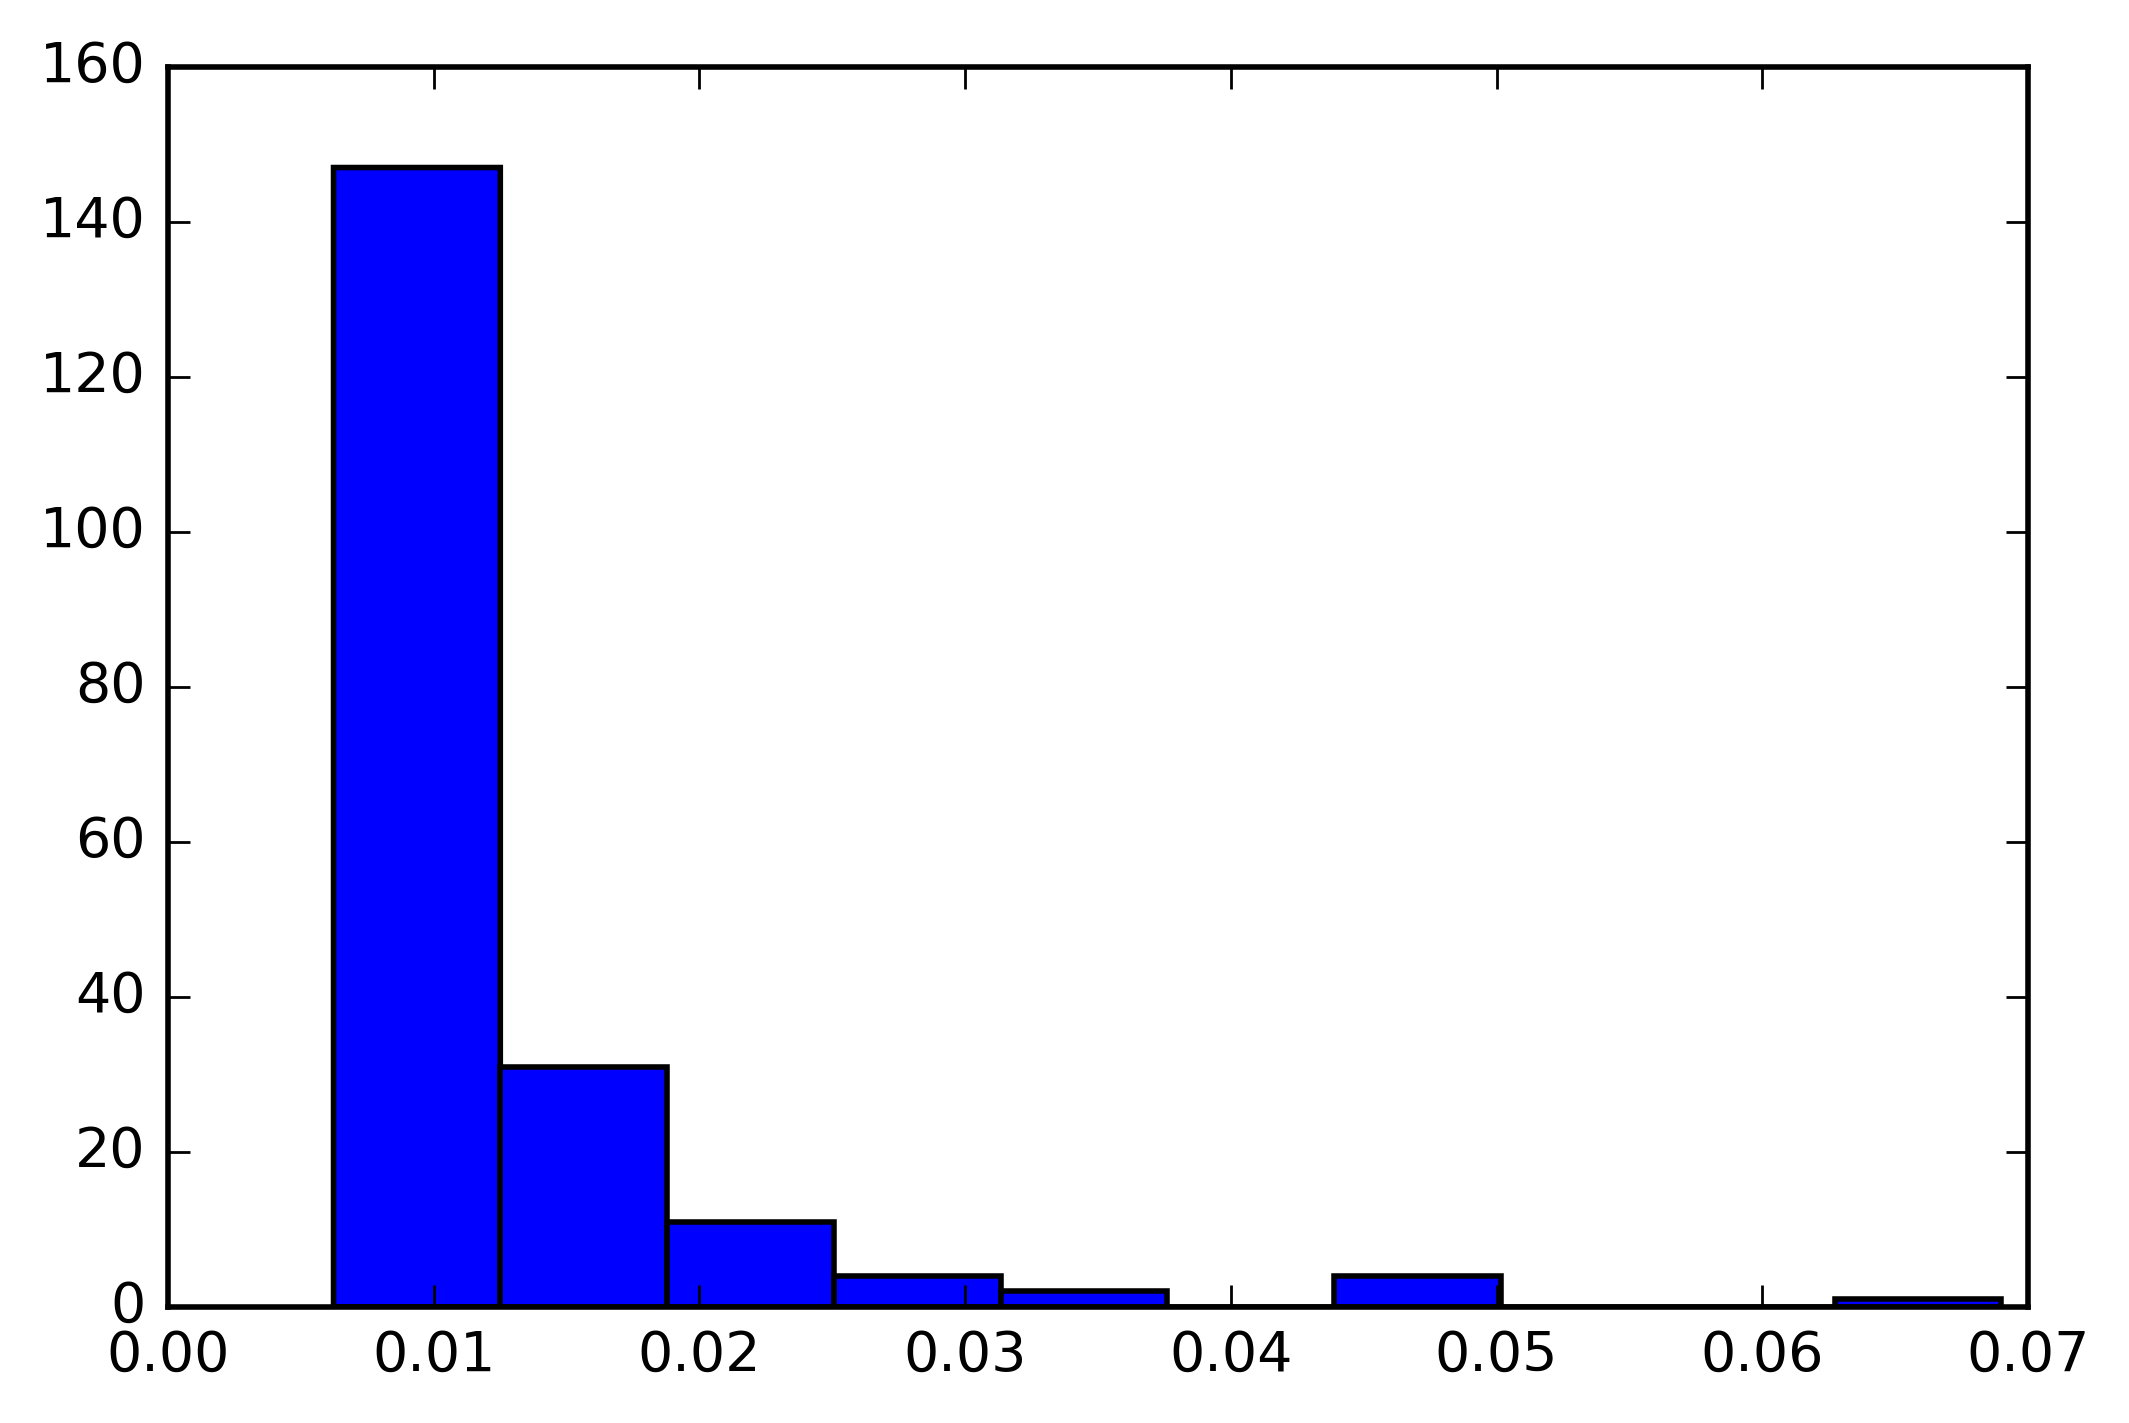

In [11]:
plt.hist([i[1] for i in tf])
plt.show()

In [12]:
tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
print u"、".join([i[0] for i in tr[:50]])

发展、建设、经济、改革、推进、创新、加强、加快、政府、推动、促进、实施、企业、政策、社会、制度、中国、提高、完善、全面、增长、扩大、支持、实现、工作、机制、人民、创业、服务、农村、试点、地方、坚持、国家、国际、继续、就业、合作、基本、加大、农业、投资、保护、问题、地区、依法、工程、取得、鼓励、建立


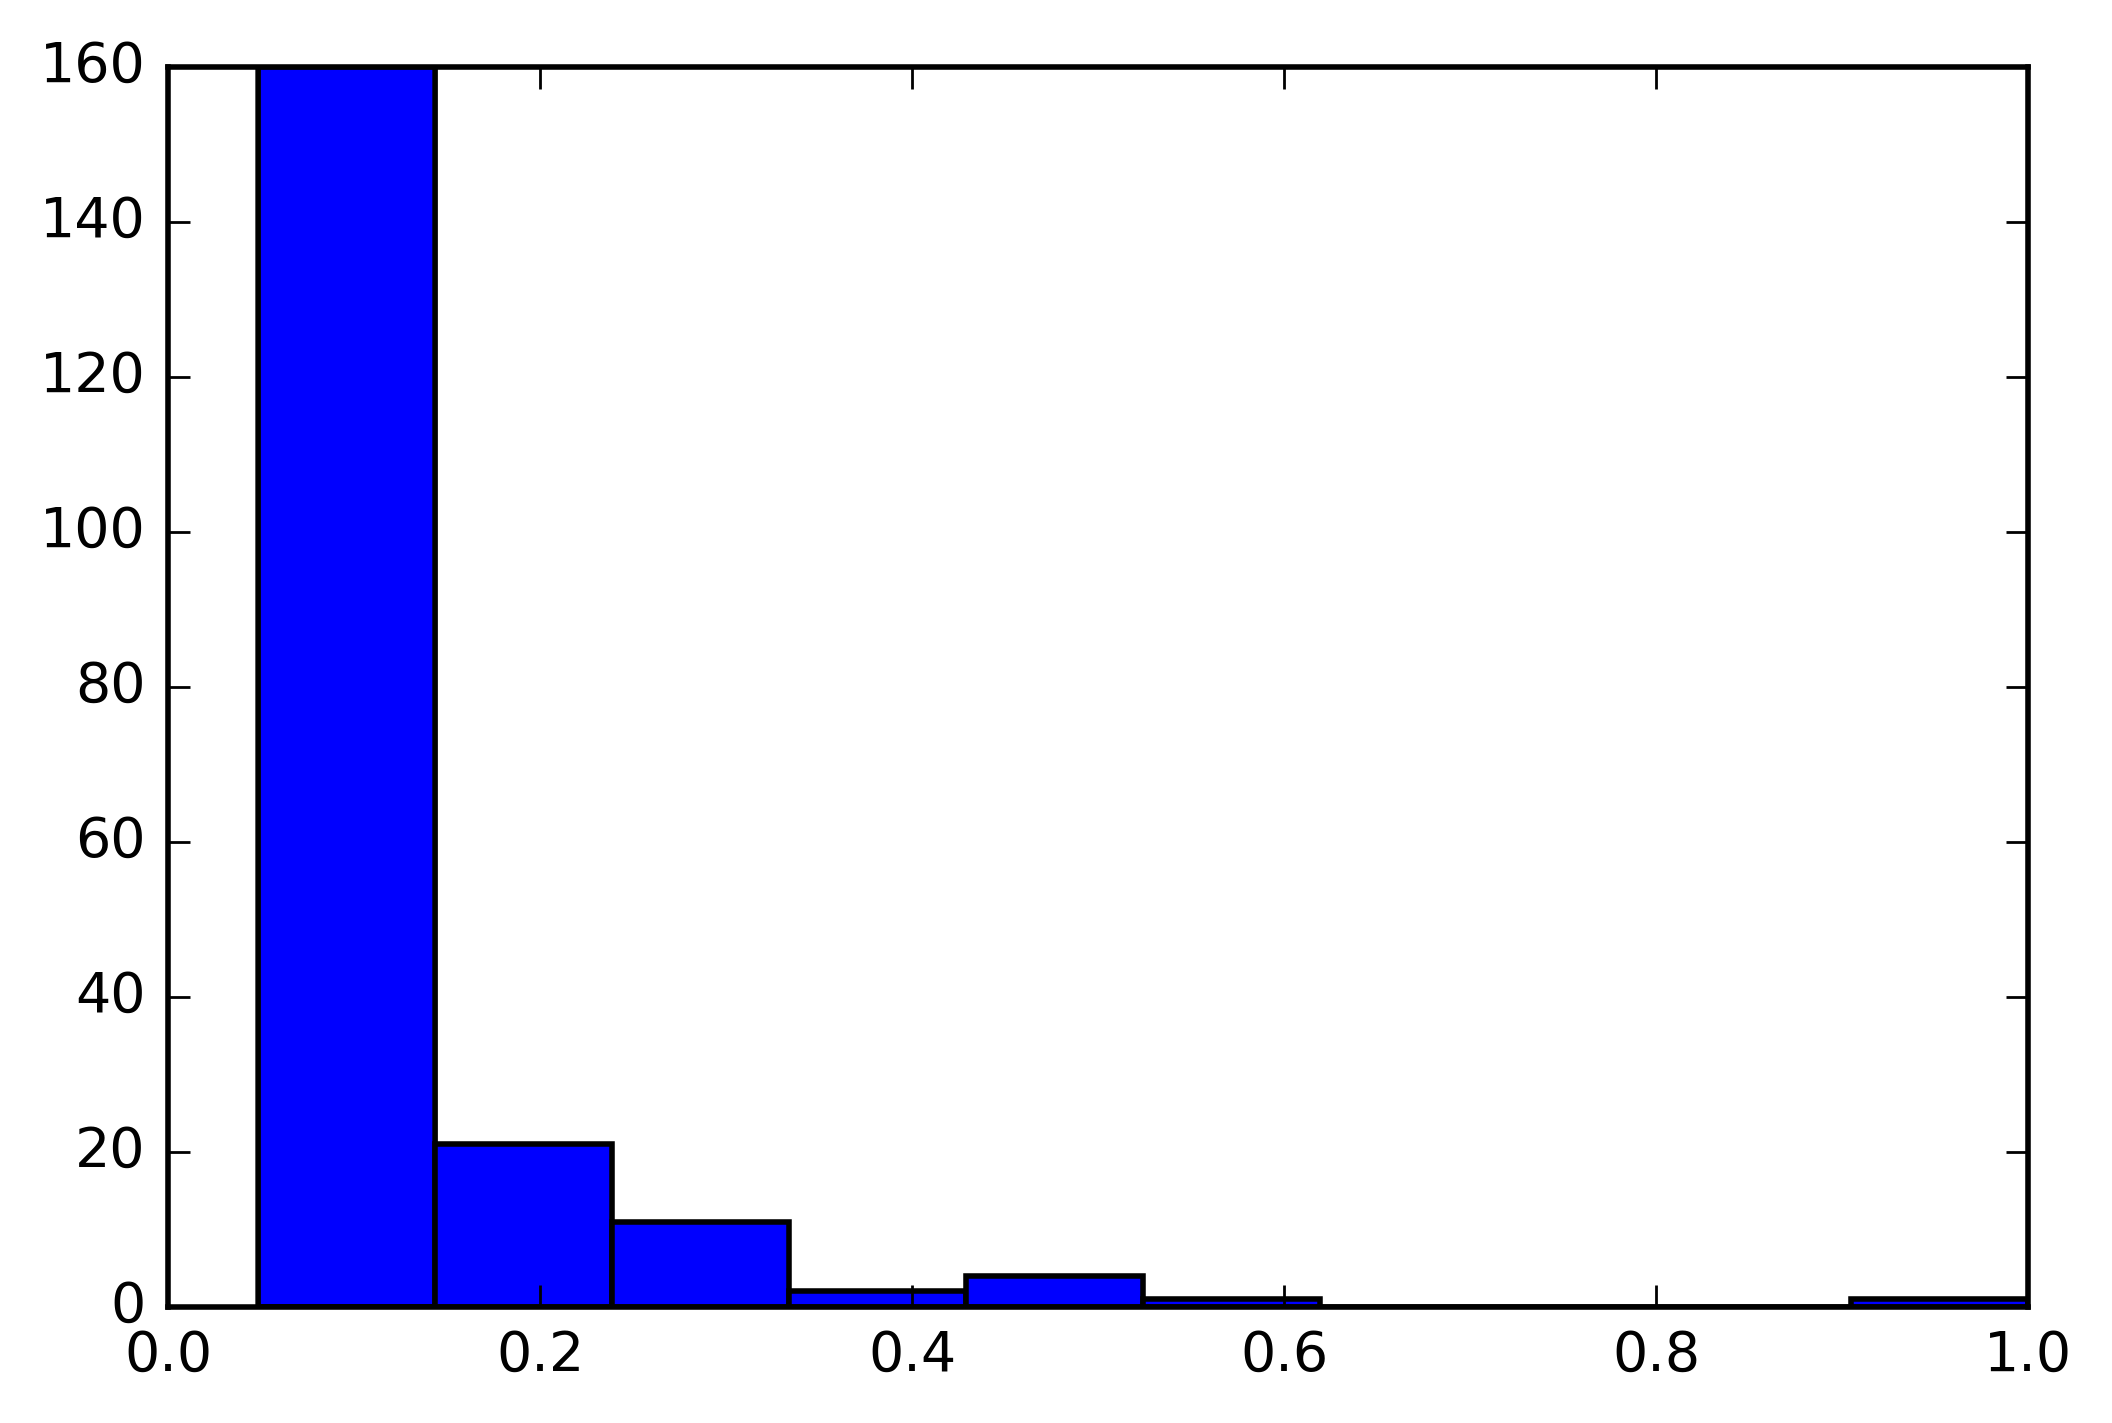

In [13]:
plt.hist([i[1] for i in tr])
plt.show()

In [63]:
import pandas as pd

def keywords(index):
    txt = reports[-index]
    tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
    tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
    tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
    trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i], 
                 fontsize = worddata.textrank[i]*15, color = 'red', rotation = 0)
    plt.title(txt[:4])
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
    plt.show()

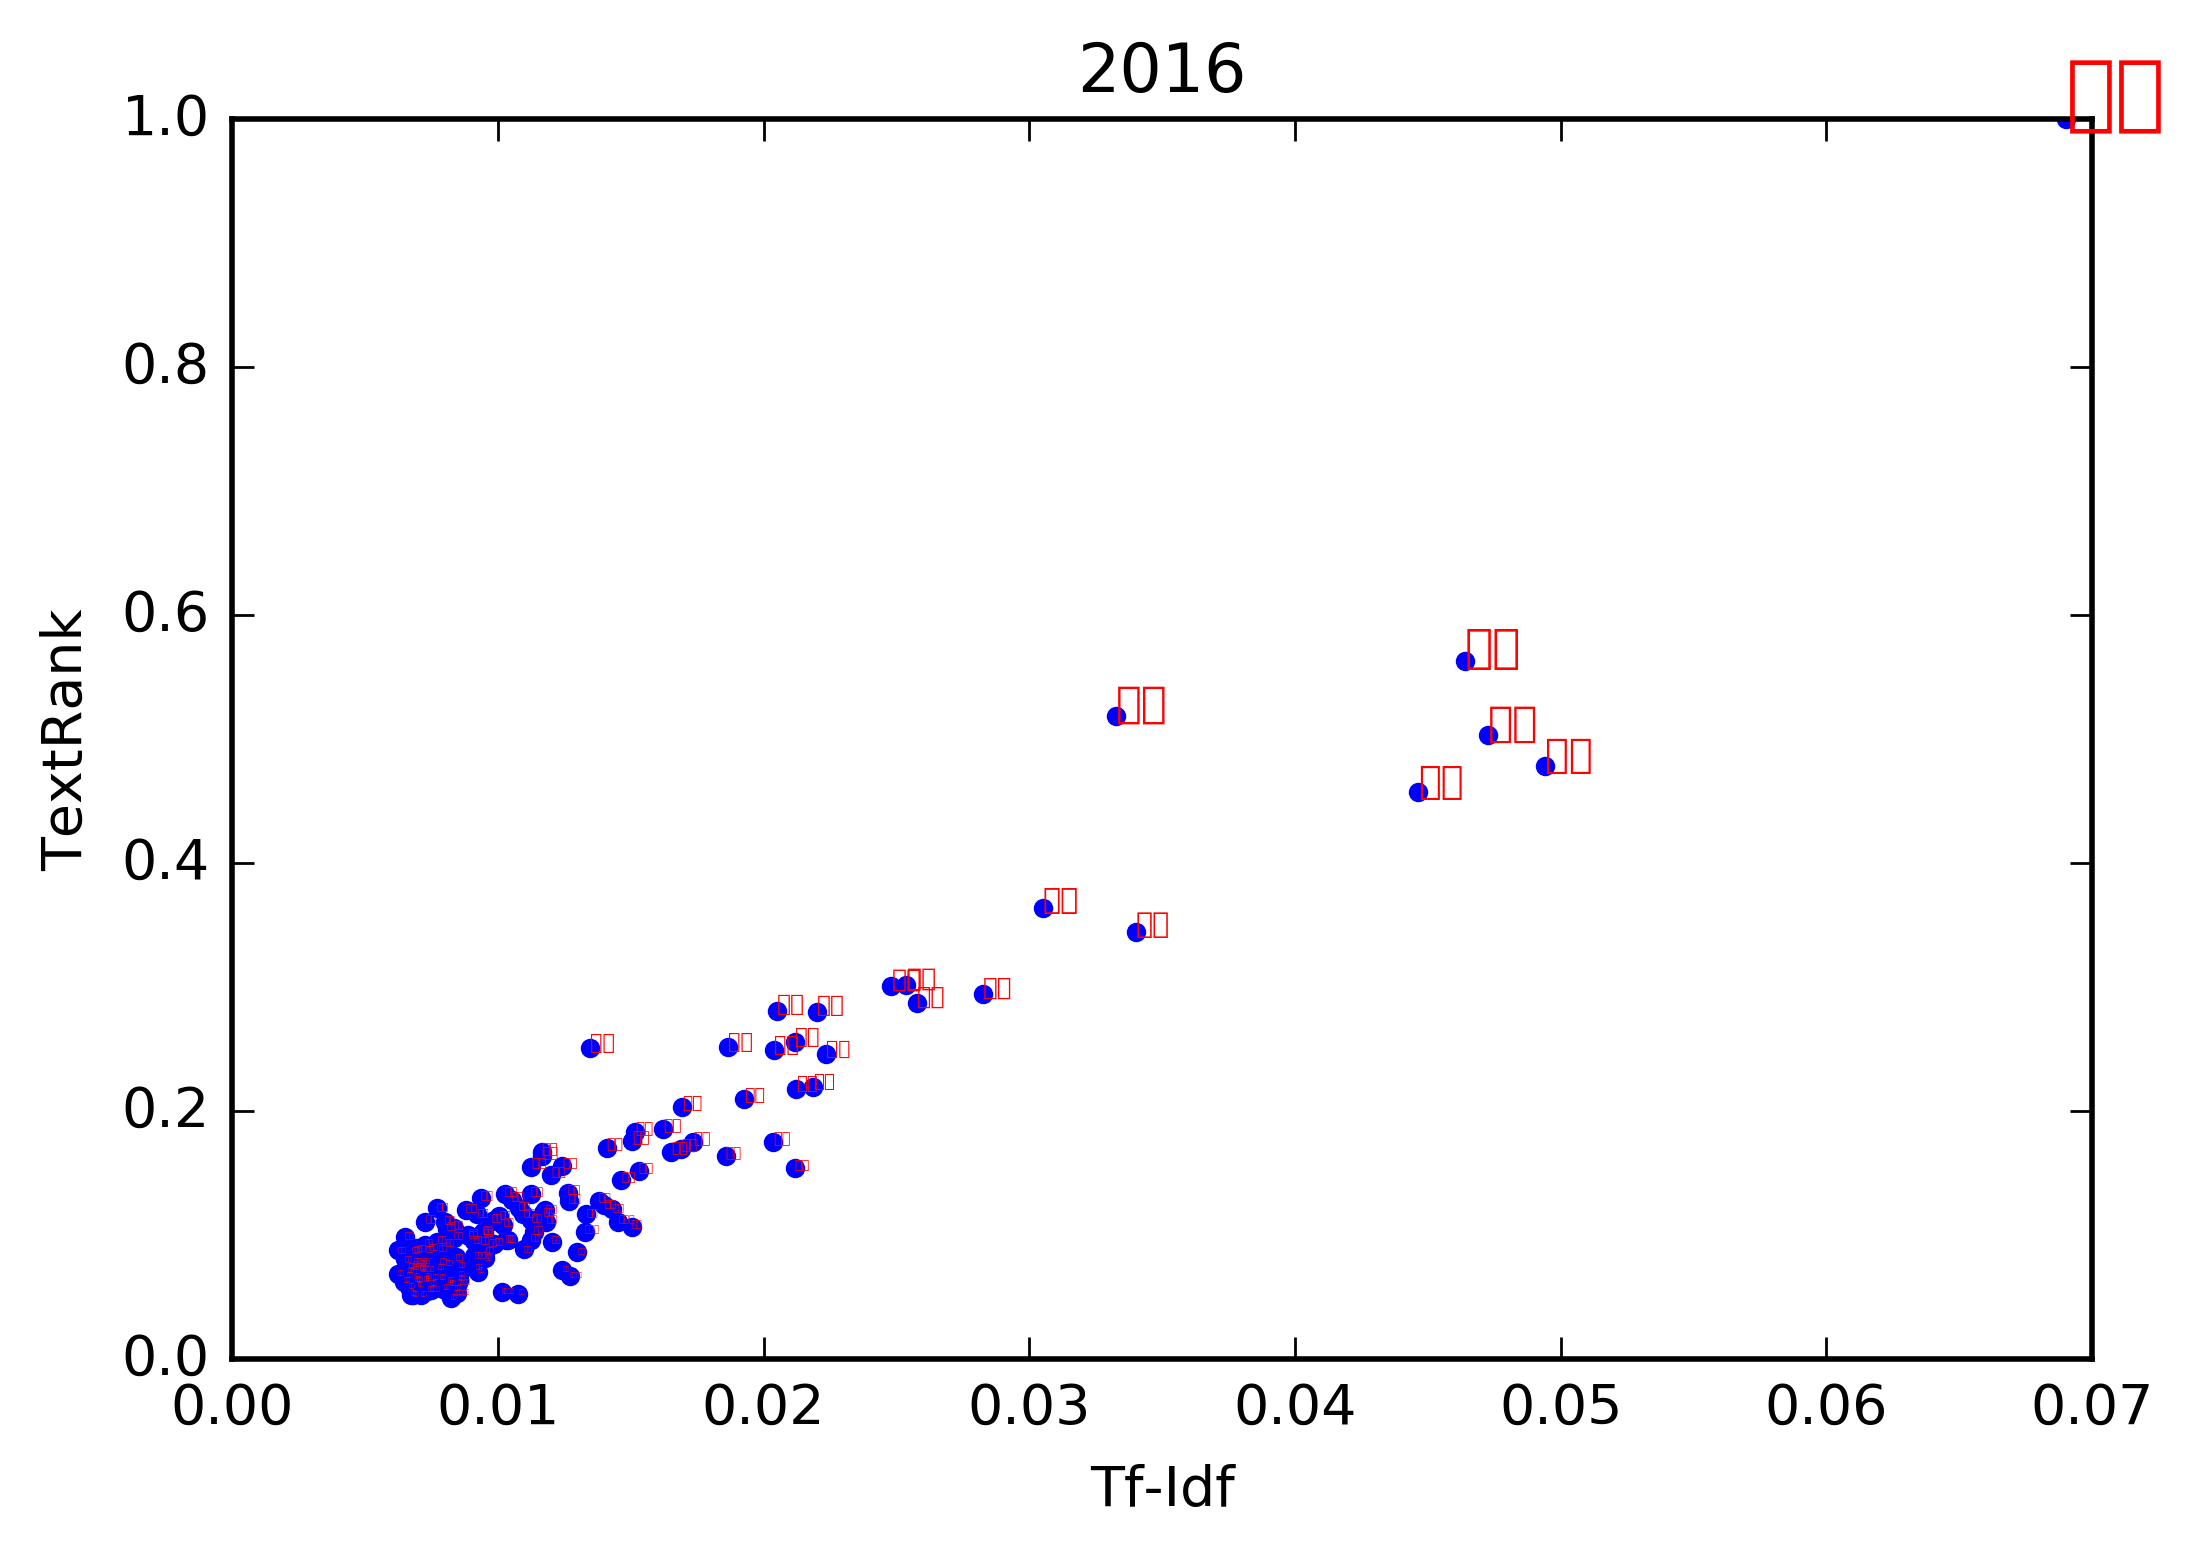

In [66]:
keywords(1)


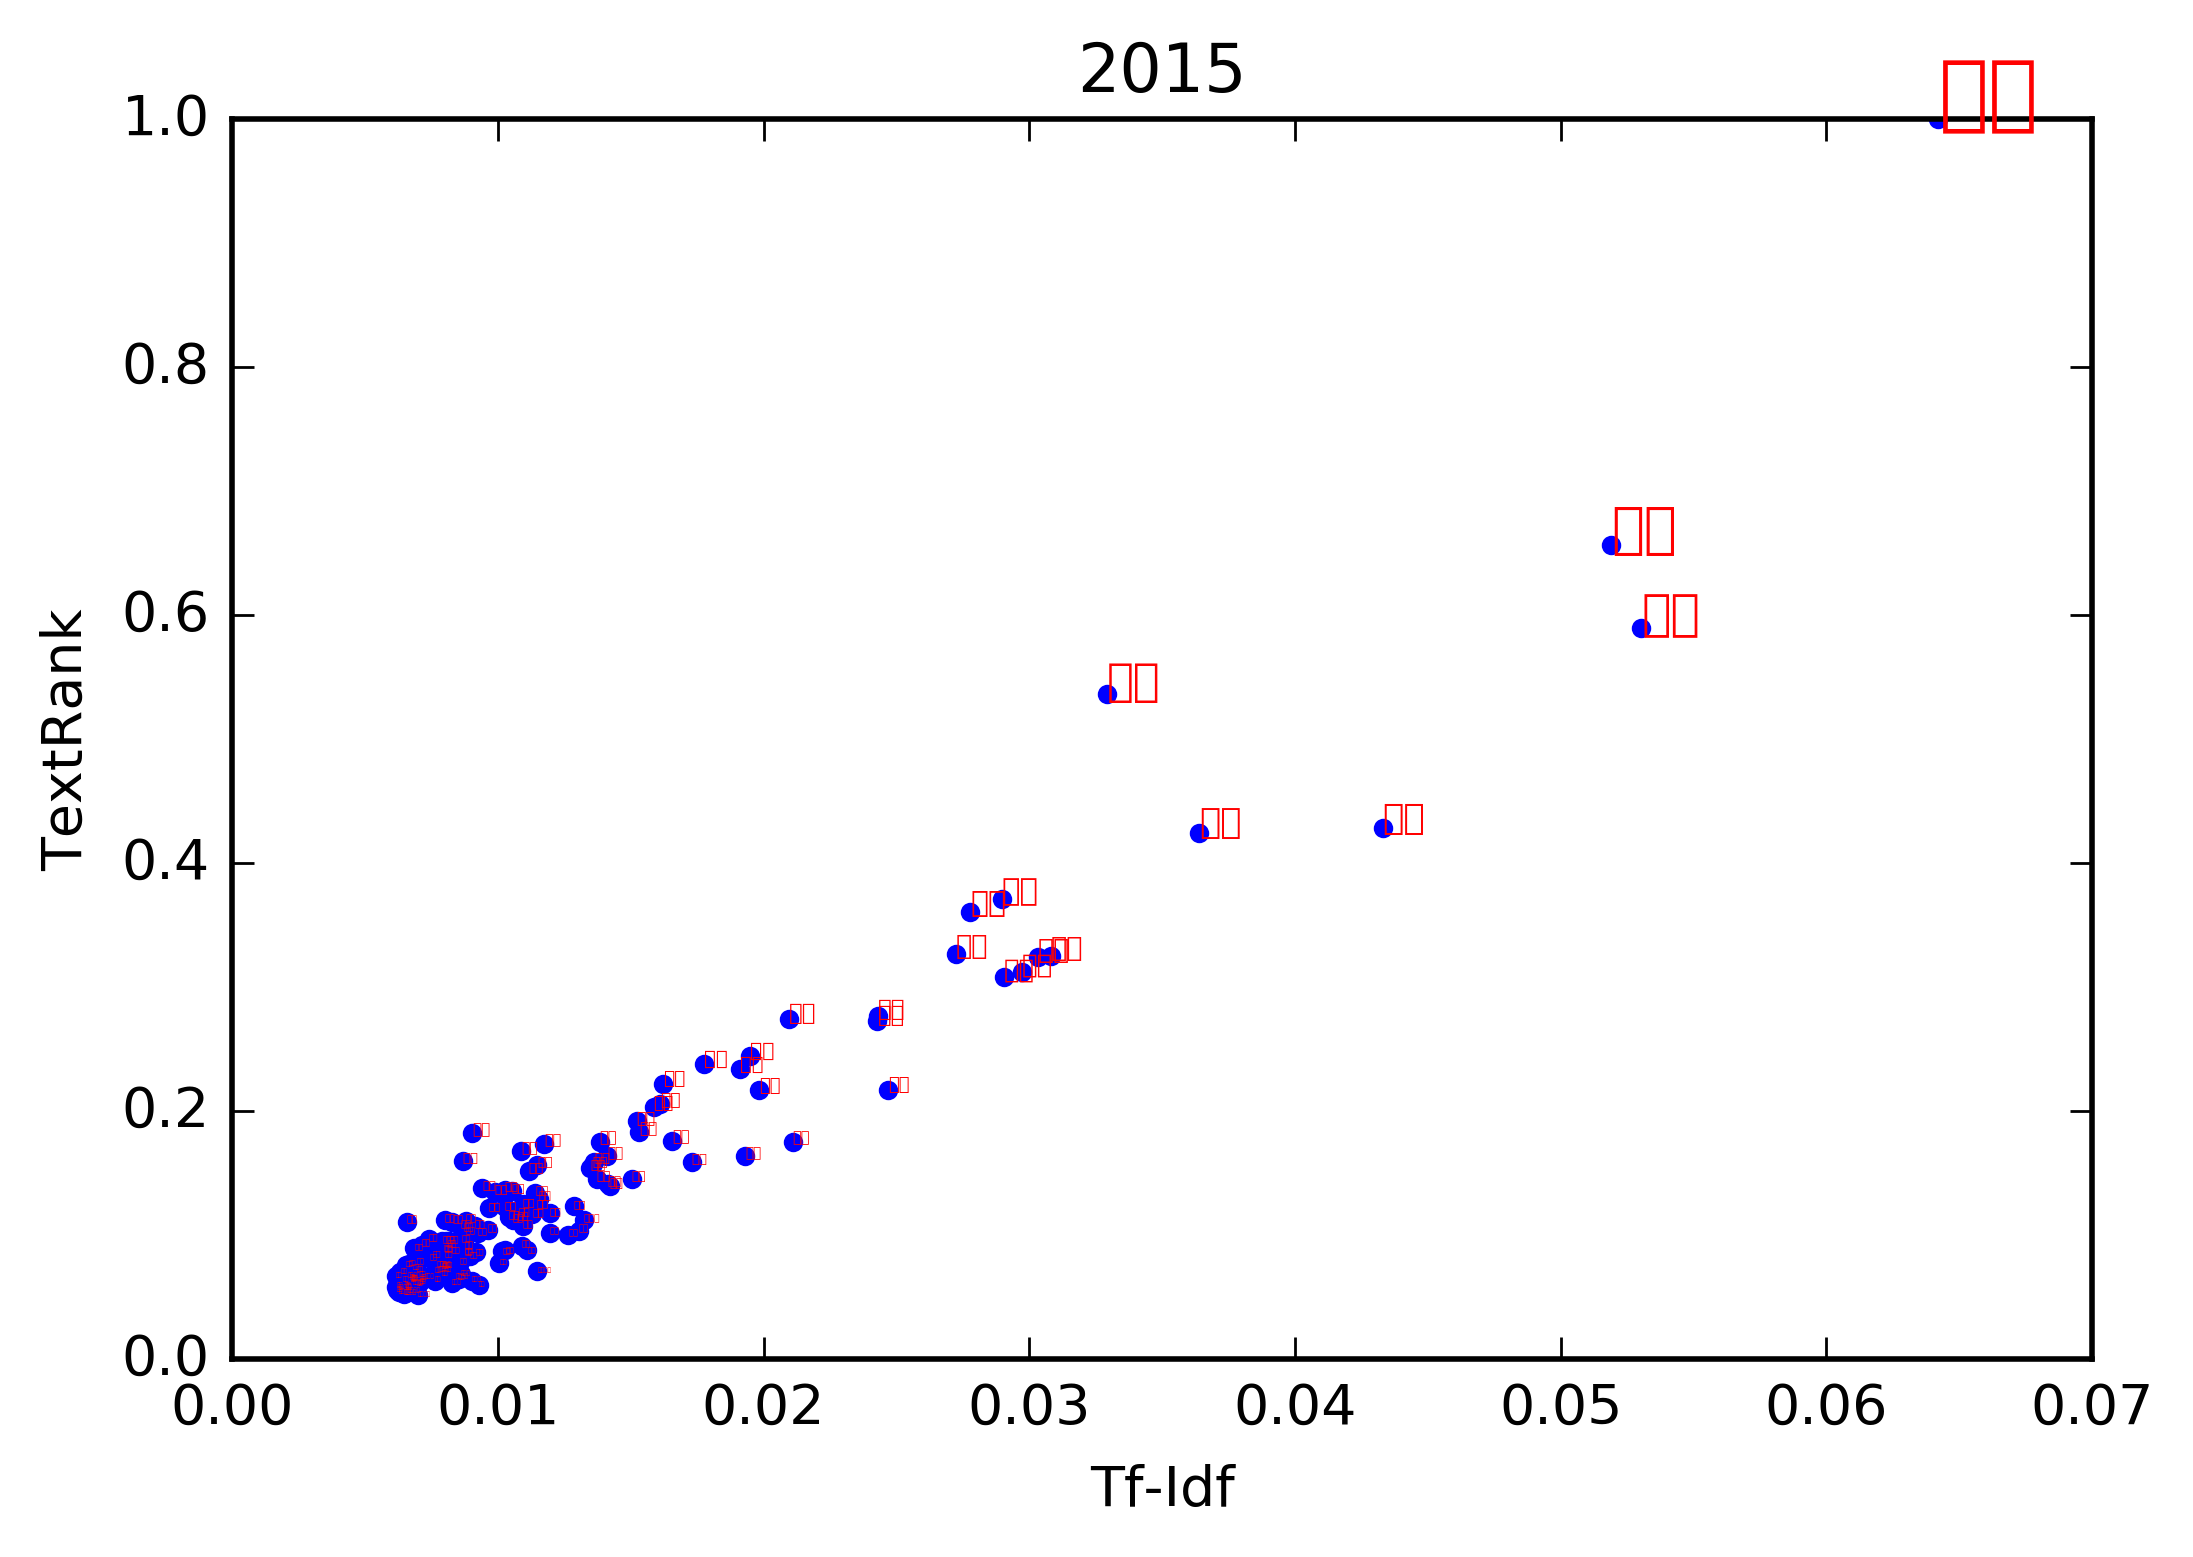

In [16]:
keywords(2)

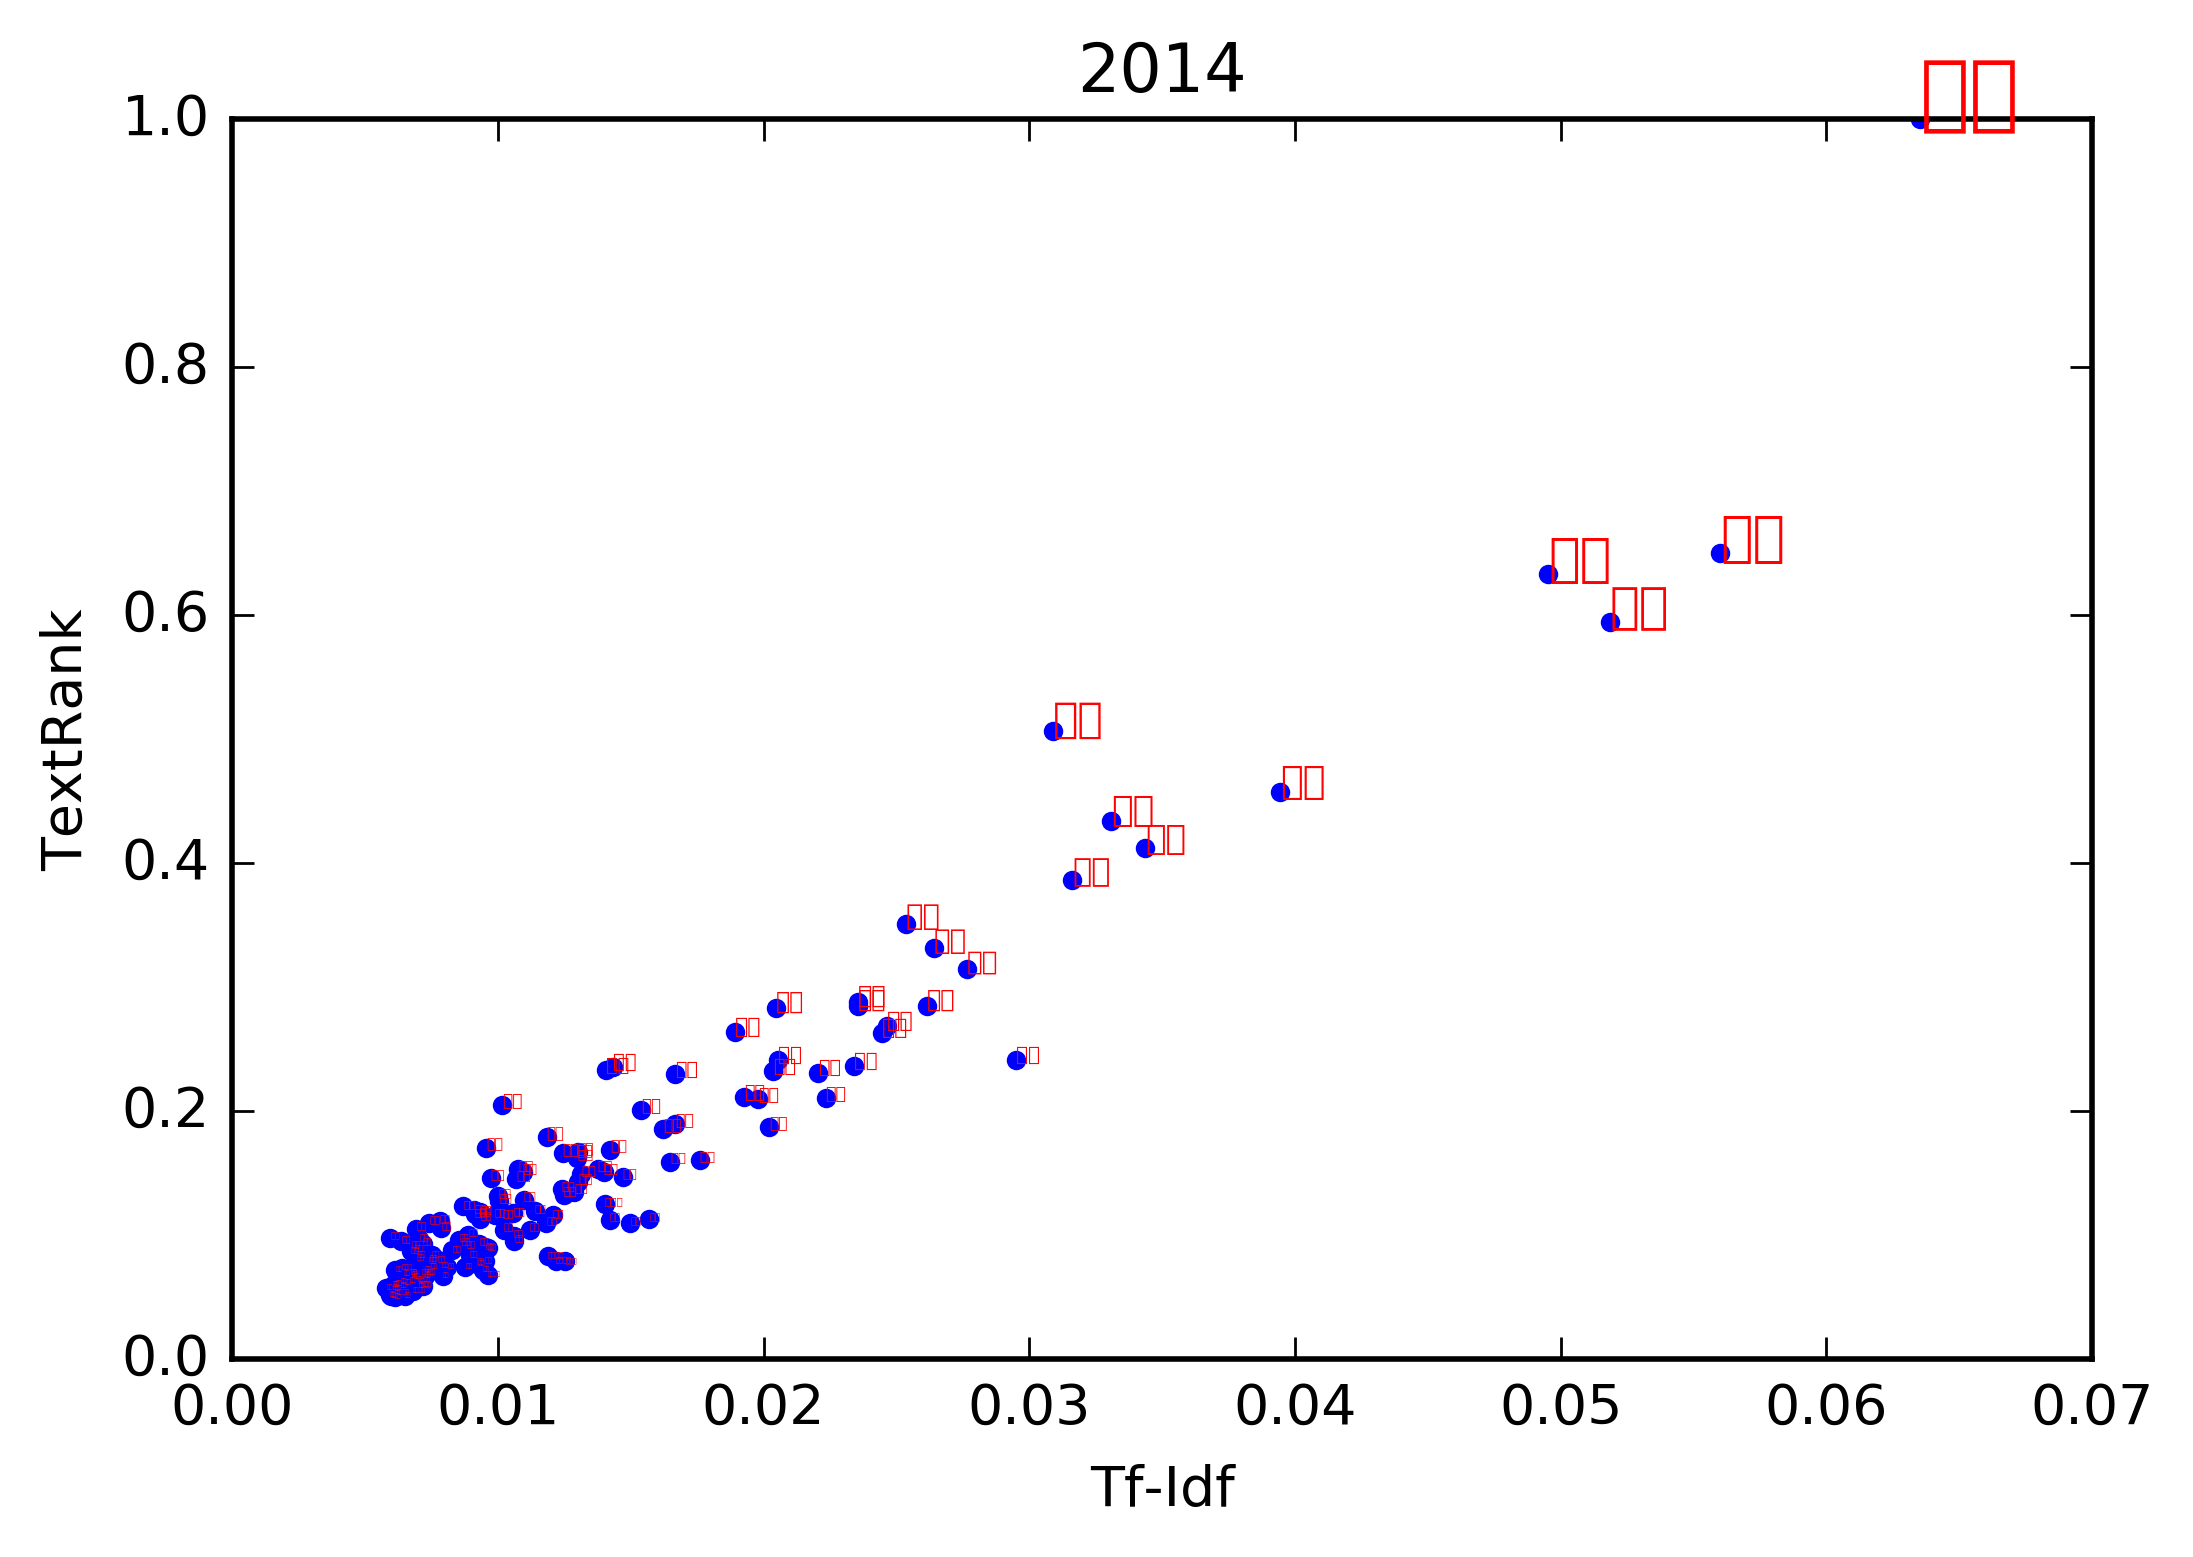

In [17]:
keywords(3)

In [18]:
def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='/Users/zouye/cjc2016/data/msyh.ttf').generate(txt)
    # Open a plot of the generated image.
    plt.imshow(wordcloud)
    plt.title(year)
    plt.axis("off")
    #plt.show()

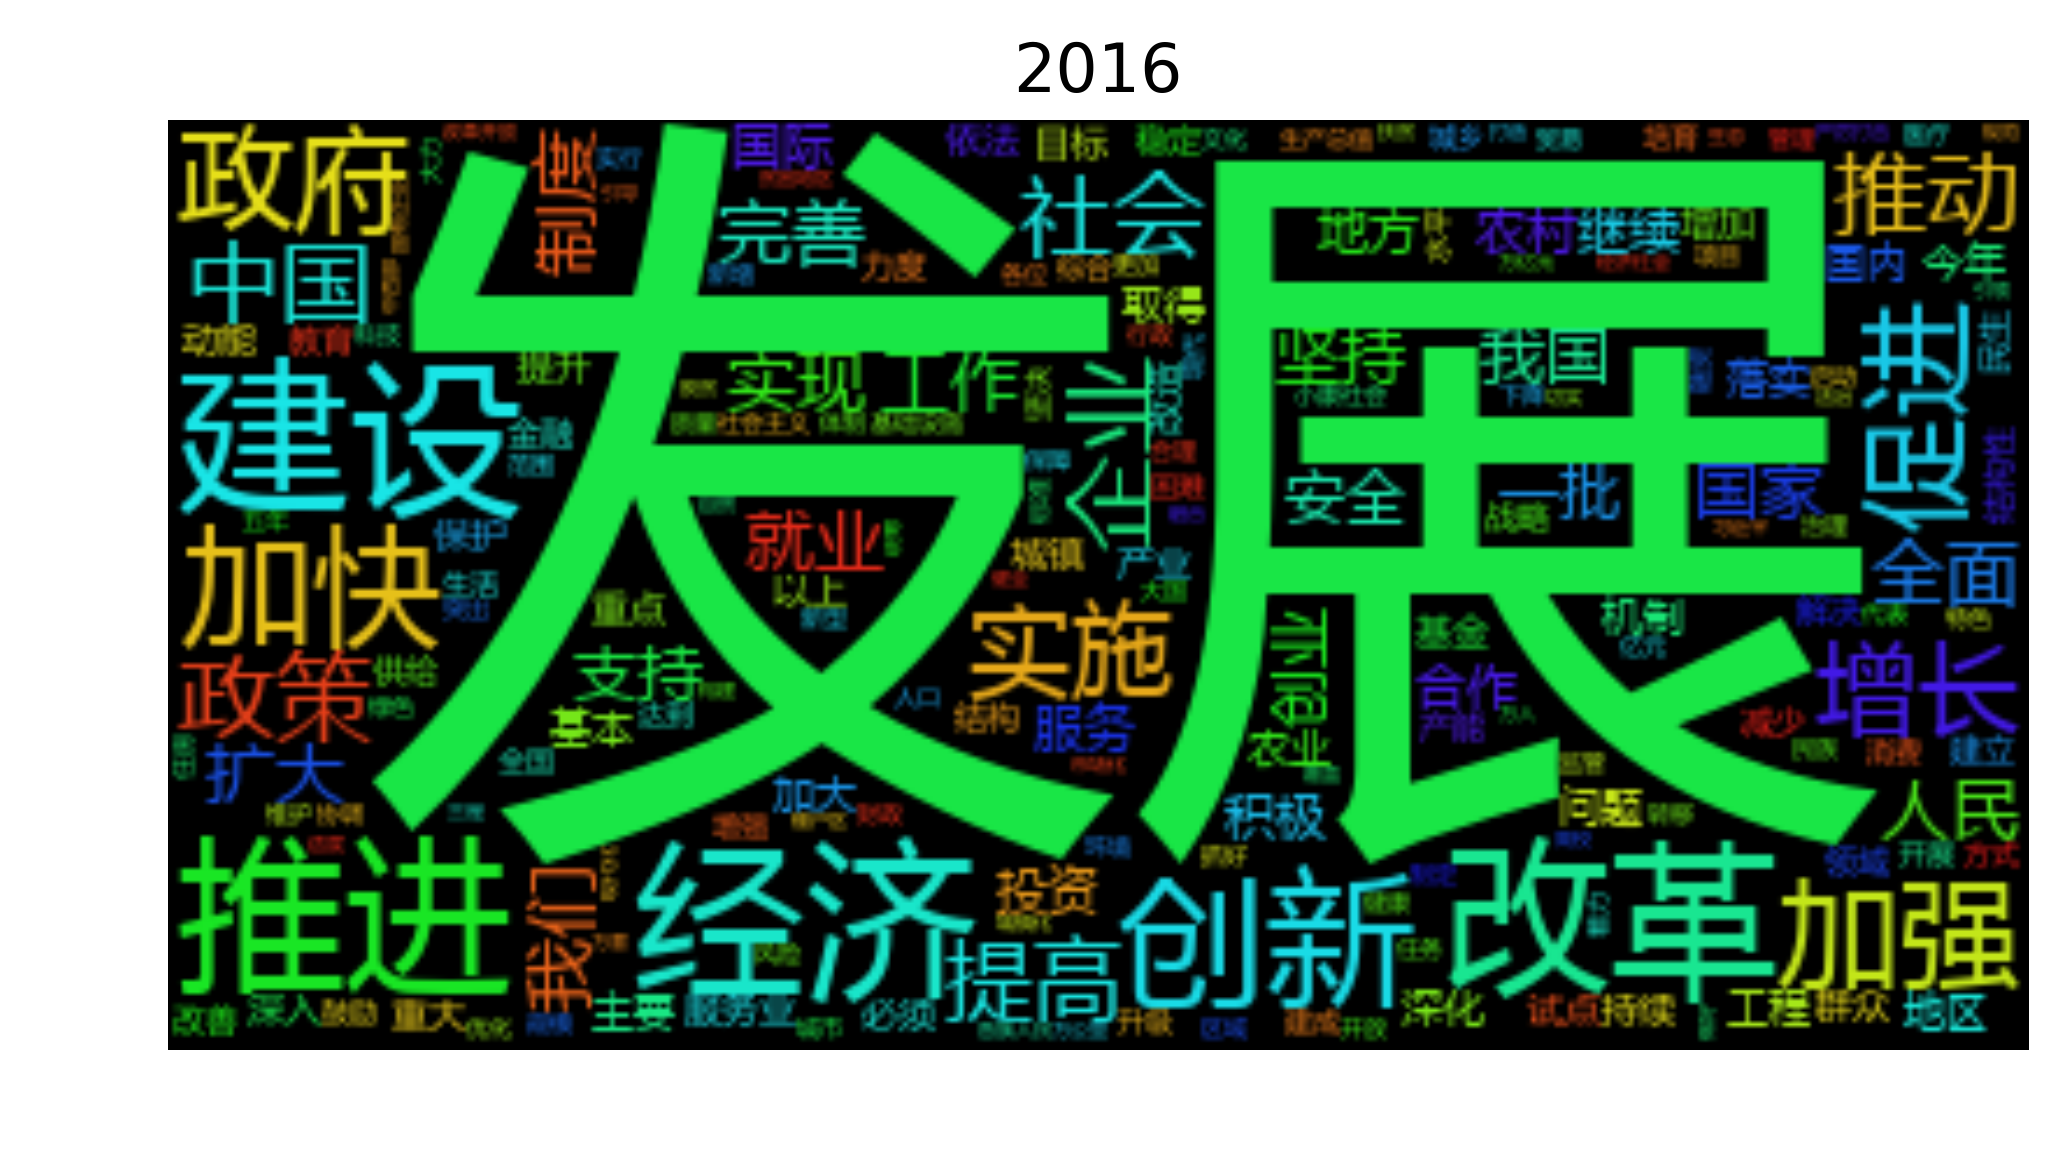

In [19]:
txt = reports[-1]
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

In [20]:

wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
print u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

发展（139）、 建设（68）、 经济（67）、 改革（62）、 推进（62）、 创新（56）、 加快（42）、 加强（41）、 政府（40）、 促进（37）、 实施（36）、 增长（36）、 企业（35）、 政策（35）、 推动（34）、 社会（34）、 中国（32）、 提高（31）、 我们（30）、 全面（28）、 完善（27）、 扩大（26）、 工作（26）、 制度（26）、 实现（25）、 就业（24）、 人民（24）、 支持（24）、 坚持（23）、 我国（22）、 国家（21）、 一批（21）、 创业（21）、 安全（21）、 农村（20）、 合作（20）、 国际（20）、 继续（19）、 地方（19）、 服务（19）、 投资（19）、 积极（19）、 取得（19）、 基本（18）、 落实（18）、 加大（18）、 机制（18）、 今年（18）、 地区（17）、 问题（17）、 农业（17）、 深化（17）、 主要（17）、 国内（16）、 工程（16）、 试点（16）、 目标（16）、 以上（16）、 城镇（15）、 保护（15）、 深入（15）、 重大（15）、 服务业（14）、 必须（14）、 增加（14）、 群众（14）、 动能（14）、 持续（14）、 依法（14）、 重点（14）、 产业（13）、 提升（13）、 改造（13）、 基金（13）、 金融（13）、 产能（13）、 供给（13）、 战略（13）、 稳定（13）、 力度（13）、 减少（13）、 领域（13）、 结构性（13）、 民生（13）、 结构（12）、 建成（12）、 教育（12）、 解决（12）、 增强（12）、 水平（12）、 消费（12）、 生活（12）、 升级（12）、 鼓励（12）、 方式（12）、 建立（12）、 改善（12）、 困难（11）、 全国（11）、 培育（11）、 开展（11）、 坚决（11）、 达到（11）、 城乡（11）、 综合（11）、 下降（10）、 生产总值（10）、 健康（10）、 特色（10）、 优化（10）、 住房（10）、 规模（10）、 风险（10）、 任务（10）、 管理（10）、 项目（10）、 质量（10）、 保障（10）、 更加（10）、 实行（10）、 亿元（10）、 新增（10）、 治理（10）、 代表（10）、 监管（

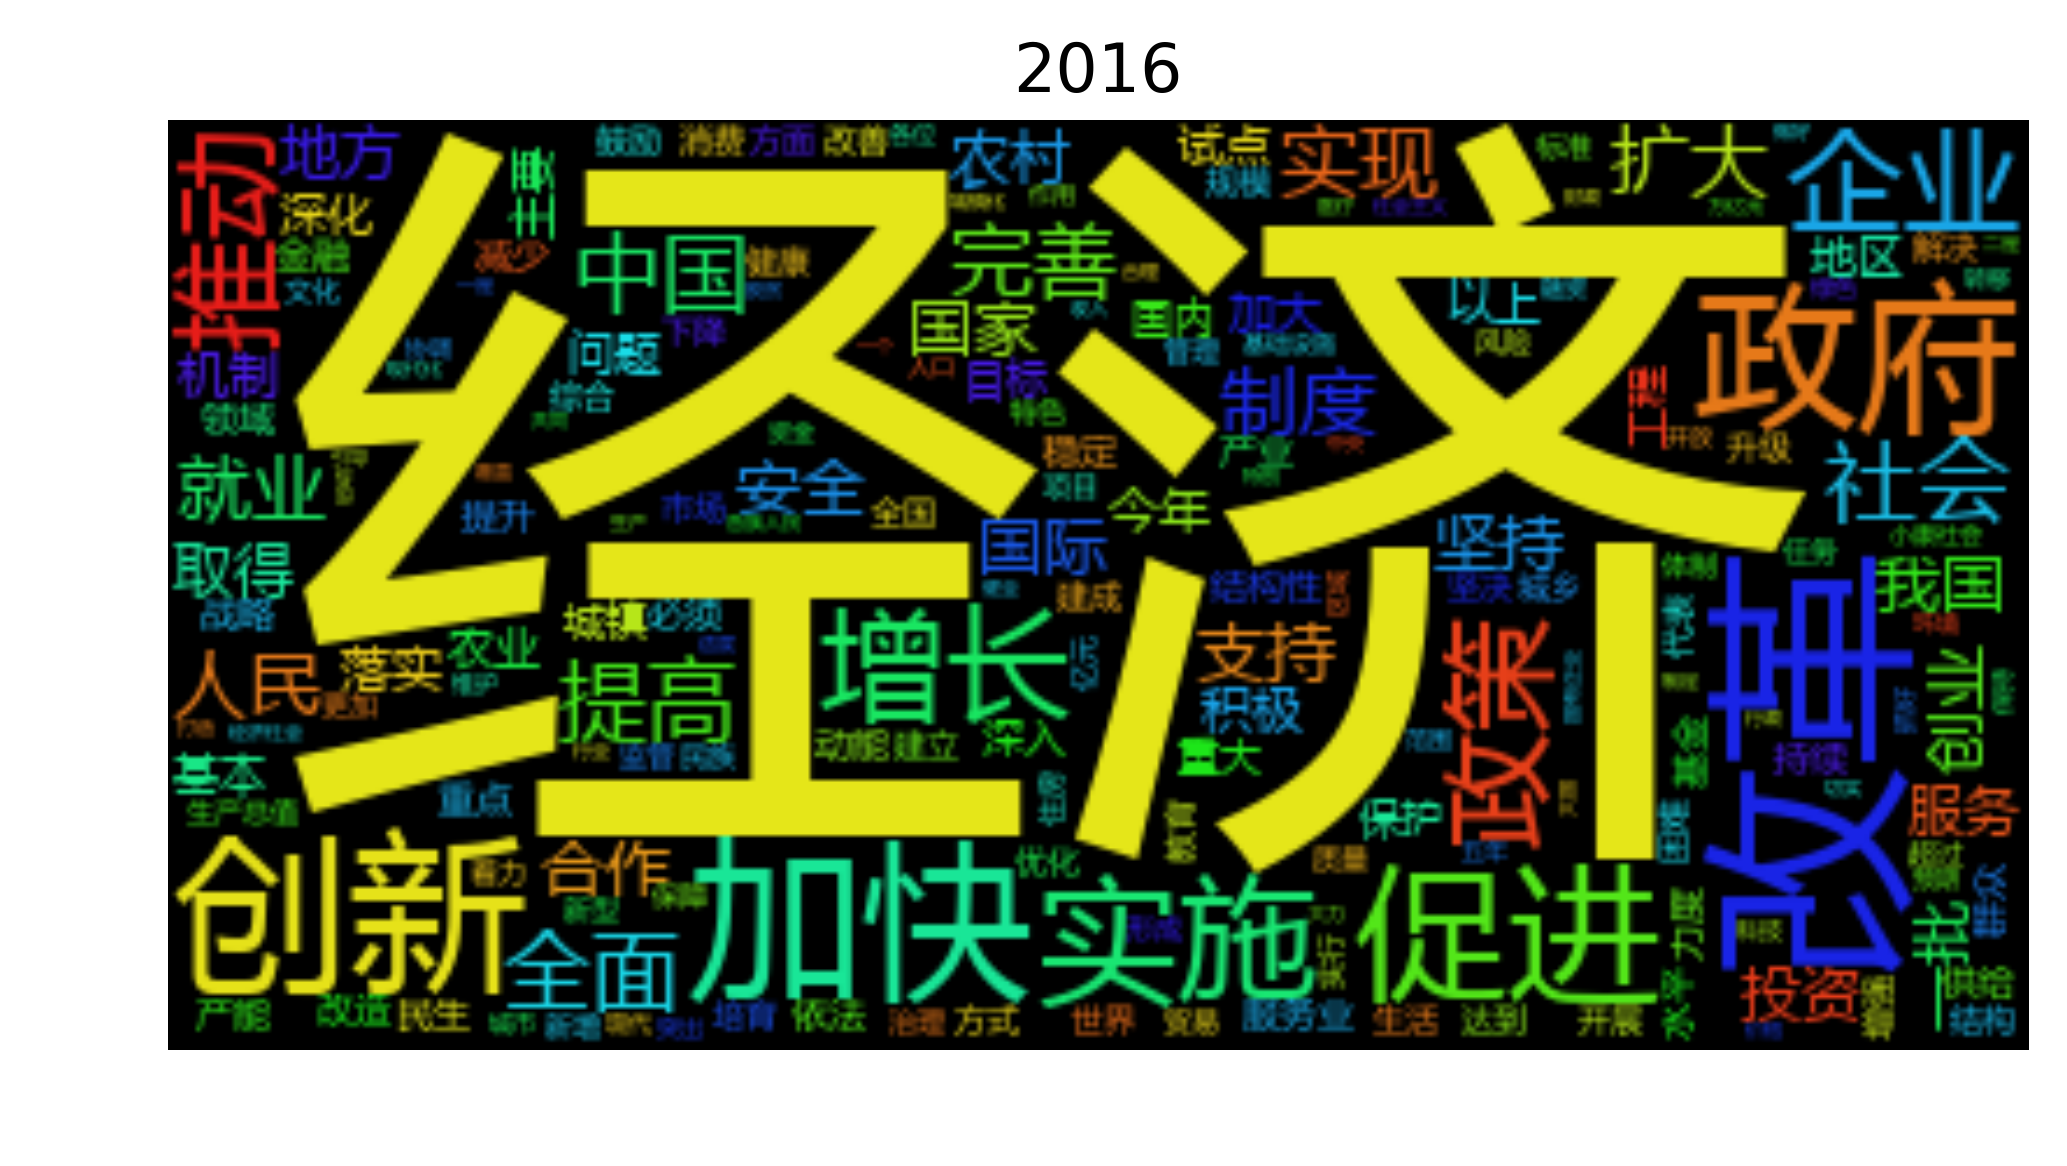

In [21]:
#jieba.add_word('股灾', freq=100, tag=None) 

txt = reports[-1]
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i not in stopwords]
txt = r' '.join(seg_list)
wordcloudplot(txt, txt[:4]) 

KeyboardInterrupt: 

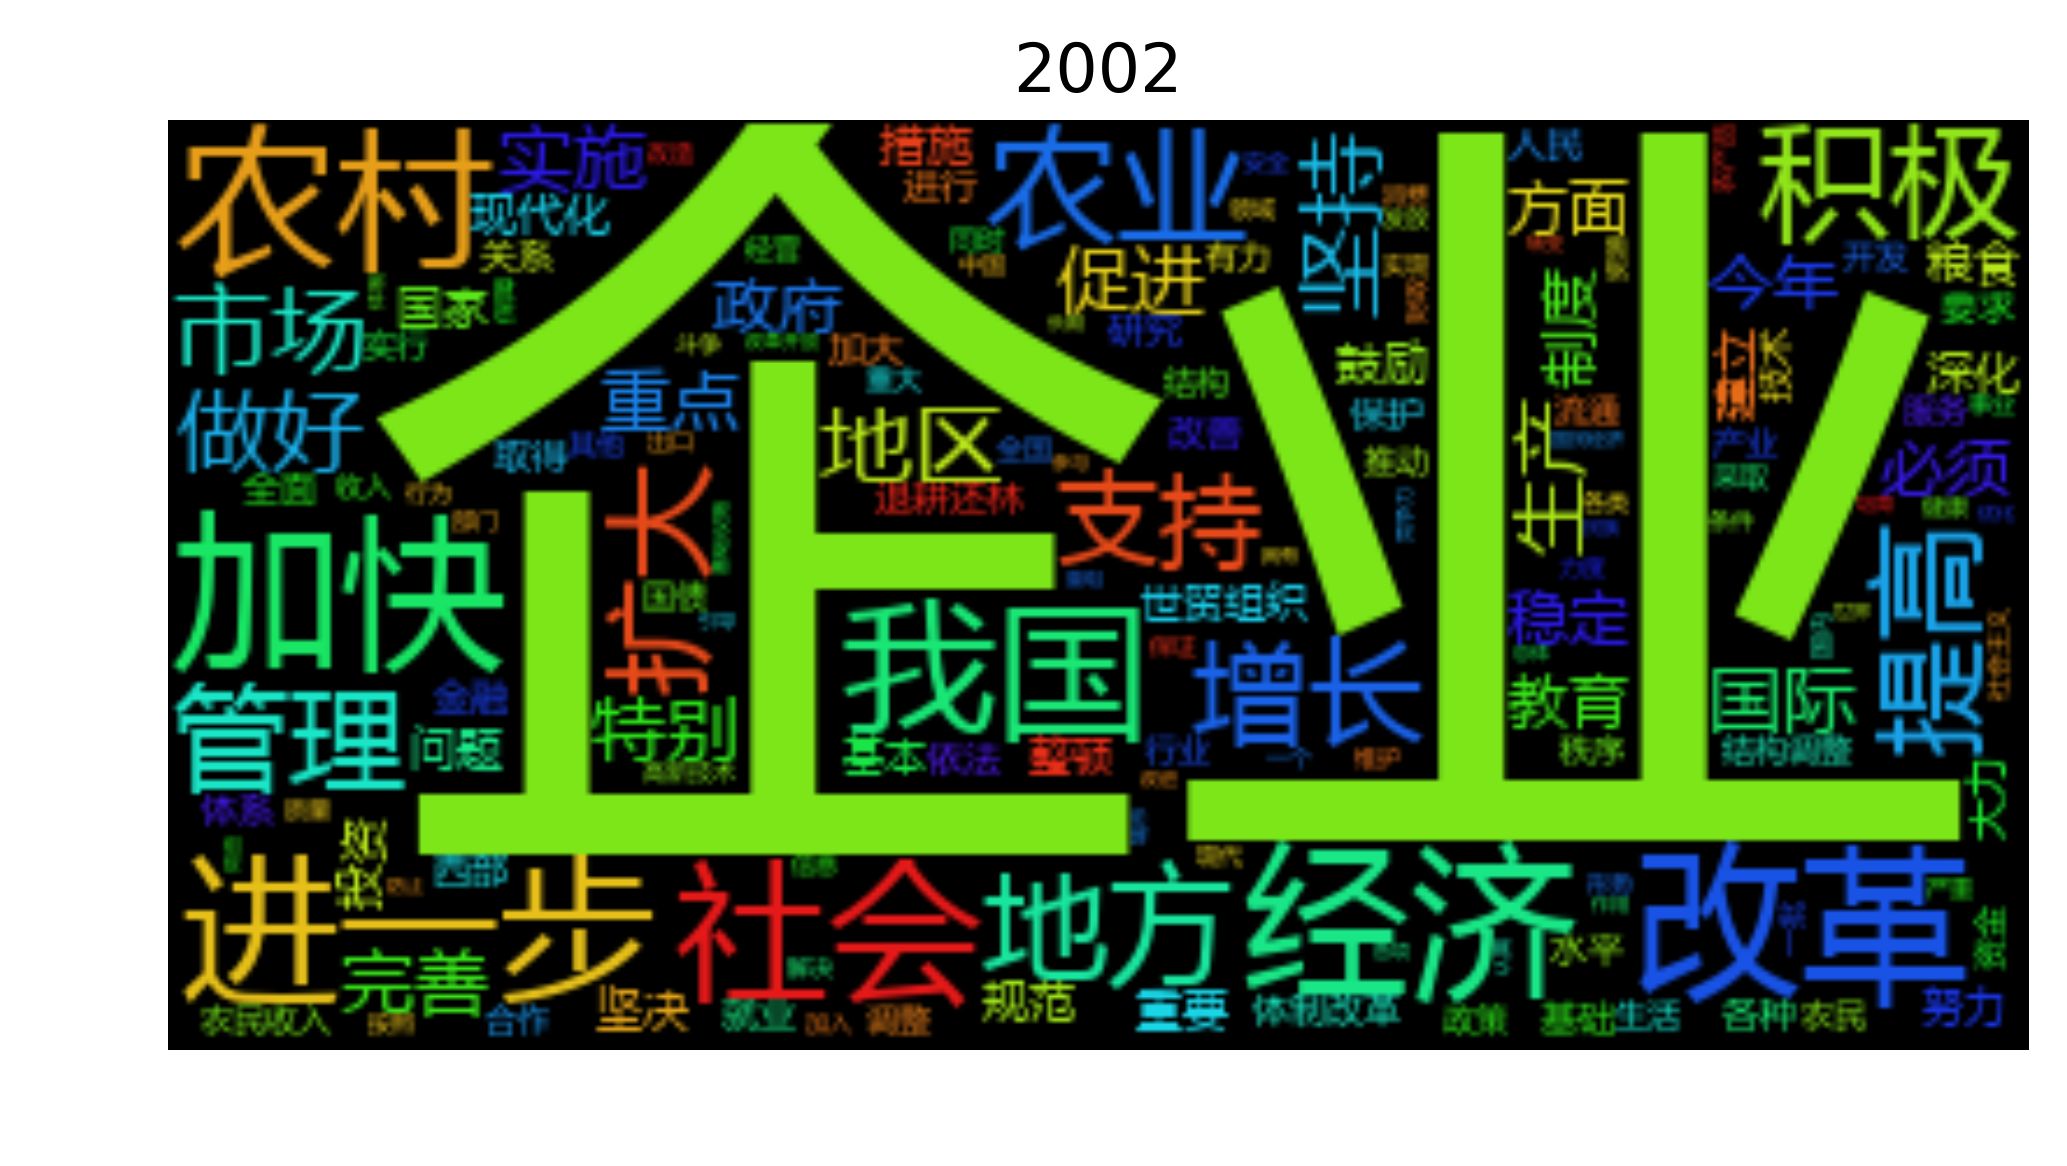

In [22]:
for txt in reports:
    seg_list = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_list if i not in stopwords]
    txt = r' '.join(seg_list)
    wordcloudplot(txt, txt[:4]) 
    file_path = '/Users/zouye/cjc2016/figure/wordcloud-' + txt[:4] + '.png'
    plt.savefig(file_path,dpi = 400, bbox_inches="tight",transparent = True)

In [23]:
import jieba.analyse

wordset = []
for txt in reports:
    top20= jieba.analyse.textrank(txt, topK=200, withWeight=False)
    for w in top20:
        if w not in wordset:
            wordset.append(w)

In [24]:
len(wordset)

1292

In [25]:
print ' '.join(wordset)

国家 人民 工业 发展 建设 工作 生产 美国 企业 经济 计划 社会主义 中国 进行 全国 技术 亚洲 集团 需要 问题 农业 方面 完成 建立 台湾 生活 事业 没有 改造 应当 资本主义 增加 关系 组织 保证 会议 侵略 不能 注意 加强 战争 提高 社会 文化 继续 政府 现代化 能够 日内瓦 世界 东南亚 运动 起来 参加 苏联 少数民族 协议 管理 浪费 实行 群众 机关 采取 解决 得到 制度 现象 条约 改善 领导 资金 革命 集体 职工 任务 政策 地方 增长 斗争 商业 工作人员 合作 情况 农民 规定 恢复 日本 卖国 法律 比重 解放 物质 实现 劳动 原则 改进 力量 城市 工程 时期 破坏 企图 朝鲜 研究 印度支那 总产值 帮助 地区 扩大 重工业 保障 合理 教育 产品 财政 作用 依靠 才能 民主 成为 巩固 华侨 中央 任意 培养 收购 制造厂 要求 分子 供应 权利 代表 粮食 包括 棉花 基础 推广 使用 表现 节约 国际 水平 损失 公私合营 行政 全部 宪法 防务 忽视 防洪 人才 不够 产量 思想 容许 国民经济 还有 等于 准备 加以 时候 希望 干涉 大家 商品 民族 经验 大陆 适应 胜利 不顾 领土 五年计划 克服 中华人民共和国 设备 工业化 决定 达到 活动 国营商业 势力 缺点 加紧 有关 联系 支持 已有 满足 指导 开展 发挥 市场 独立 铁路 昌都地区 保卫 部门 正义 知识分子 应该 可能 投资 增产 单位 设计 工人 条件 制造 形式 建成 原料 手工业 工厂 开始 办法 资本家 规模 新建 农村 例如 过渡时期 认为 工业生产 干部 大量 职员 施工 减少 学习 土地 帝国主义 利用 援助 数量 限额 人员 指标 厂矿 加工 汽车 种类 速度 工人阶级 原有 学校 质量 科学技术 方针 政治 轻工业 错误 措施 定货 合作化 改变 经营 统治 接受 周转量 试制 改建 材料 个体 道路 工业品 面积 积极性 薯类 产值 重点 实际 建筑 促进 水利 所有制 消费品 总任务 历史 掌握 非生产性 标准 比例 预算 支出 收入 部分 执行 国营 立井 公路 项目 税收 总数 片面 数字 价格 钢材 扣除 国营企业 预计 收支 状况 兰州 拨付 货物 水库 工业部 降低 可比 过程 储备 包头 决算

In [26]:
from collections import defaultdict

data = defaultdict(dict)
years = [int(i[:4]) for i in reports]
for i in wordset:
    for year in years:
        data[i][year] = 0

In [28]:

for txt in reports:
    year = int(txt[:4])
    top1000= jieba.analyse.textrank(txt, topK=1000, withWeight=True)
    for ww in top1000:
        word, weight = ww
        if word in wordset:
            data[word][year]+= weight

In [29]:
word_weight = []
for i in data:
    word_weight.append([i, np.sum(data[i].values())])

In [30]:
word_weight.sort(key= lambda x:x[1], reverse = True )
top50 = [i[0] for i in word_weight[:50]]

In [31]:
print ' '.join(top50) 

发展 建设 经济 加强 企业 工作 改革 国家 人民 继续 社会主义 提高 社会 生产 农业 政府 制度 增加 推进 问题 促进 增长 方面 农村 管理 加快 进行 重点 坚持 全国 教育 投资 市场 工业 地区 完善 计划 实行 支持 政策 生活 中国 文化 扩大 实现 基本 改善 建立 技术 群众


In [32]:
def plotEvolution(word, color, linestyle, marker):
    cx = data[word]
    plt.plot(cx.keys(), cx.values(), color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=8)
    plt.ylabel(u'词语重要性')

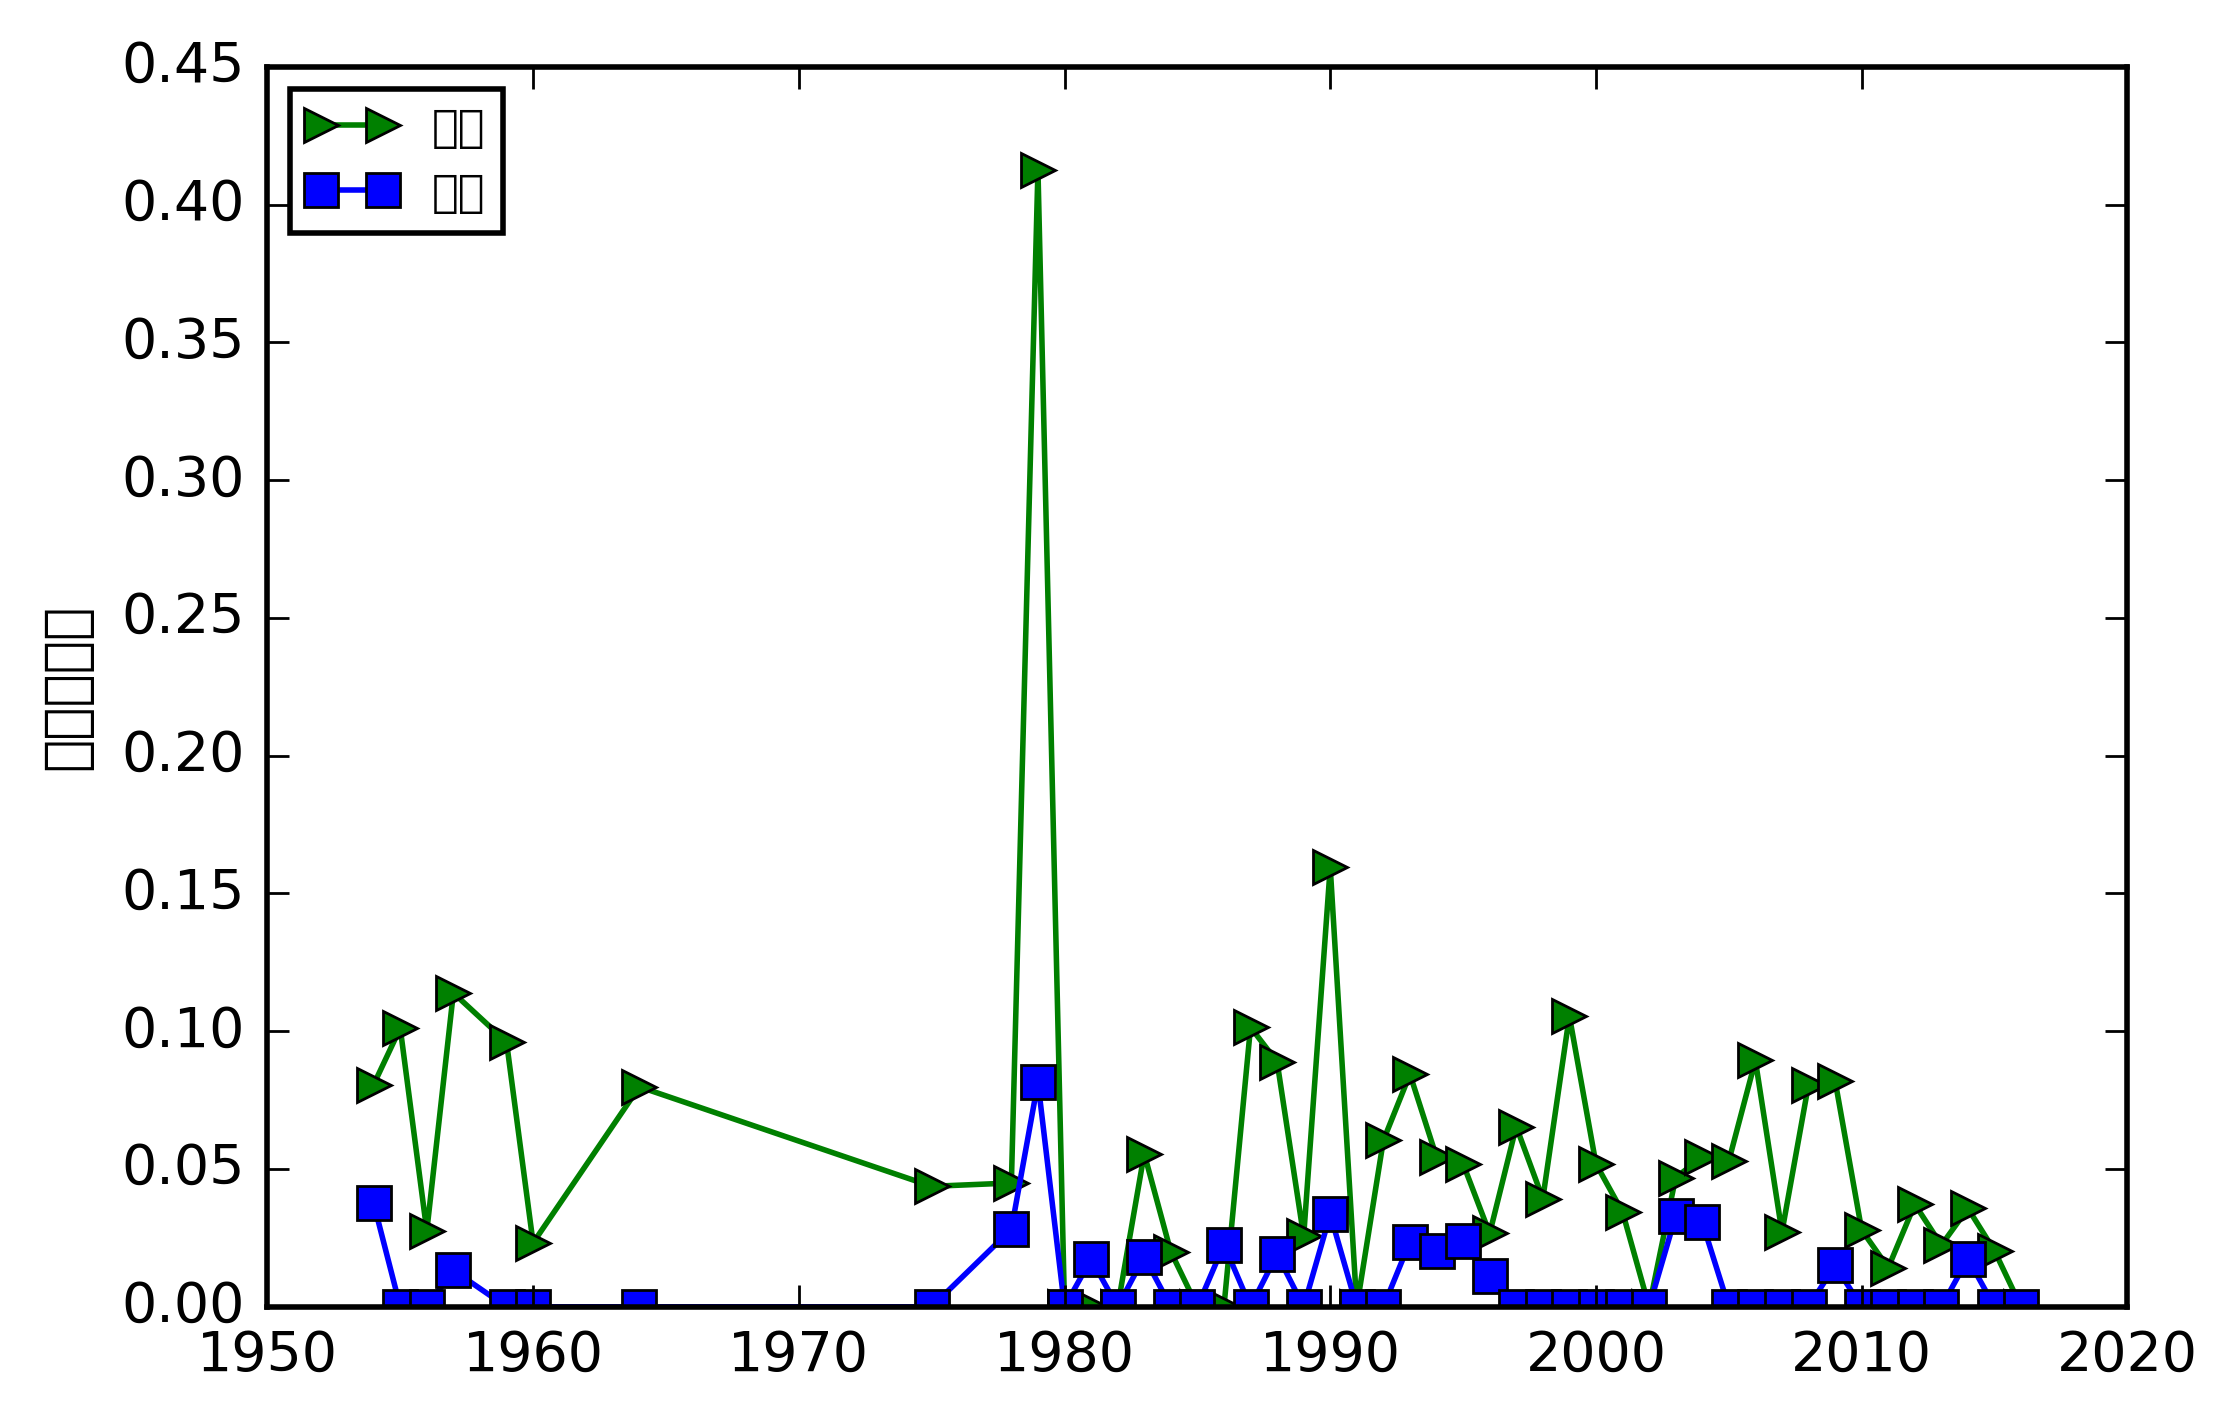

In [33]:
plotEvolution(u'民主', 'g', '-', '>')
plotEvolution(u'法制', 'b', '-', 's')

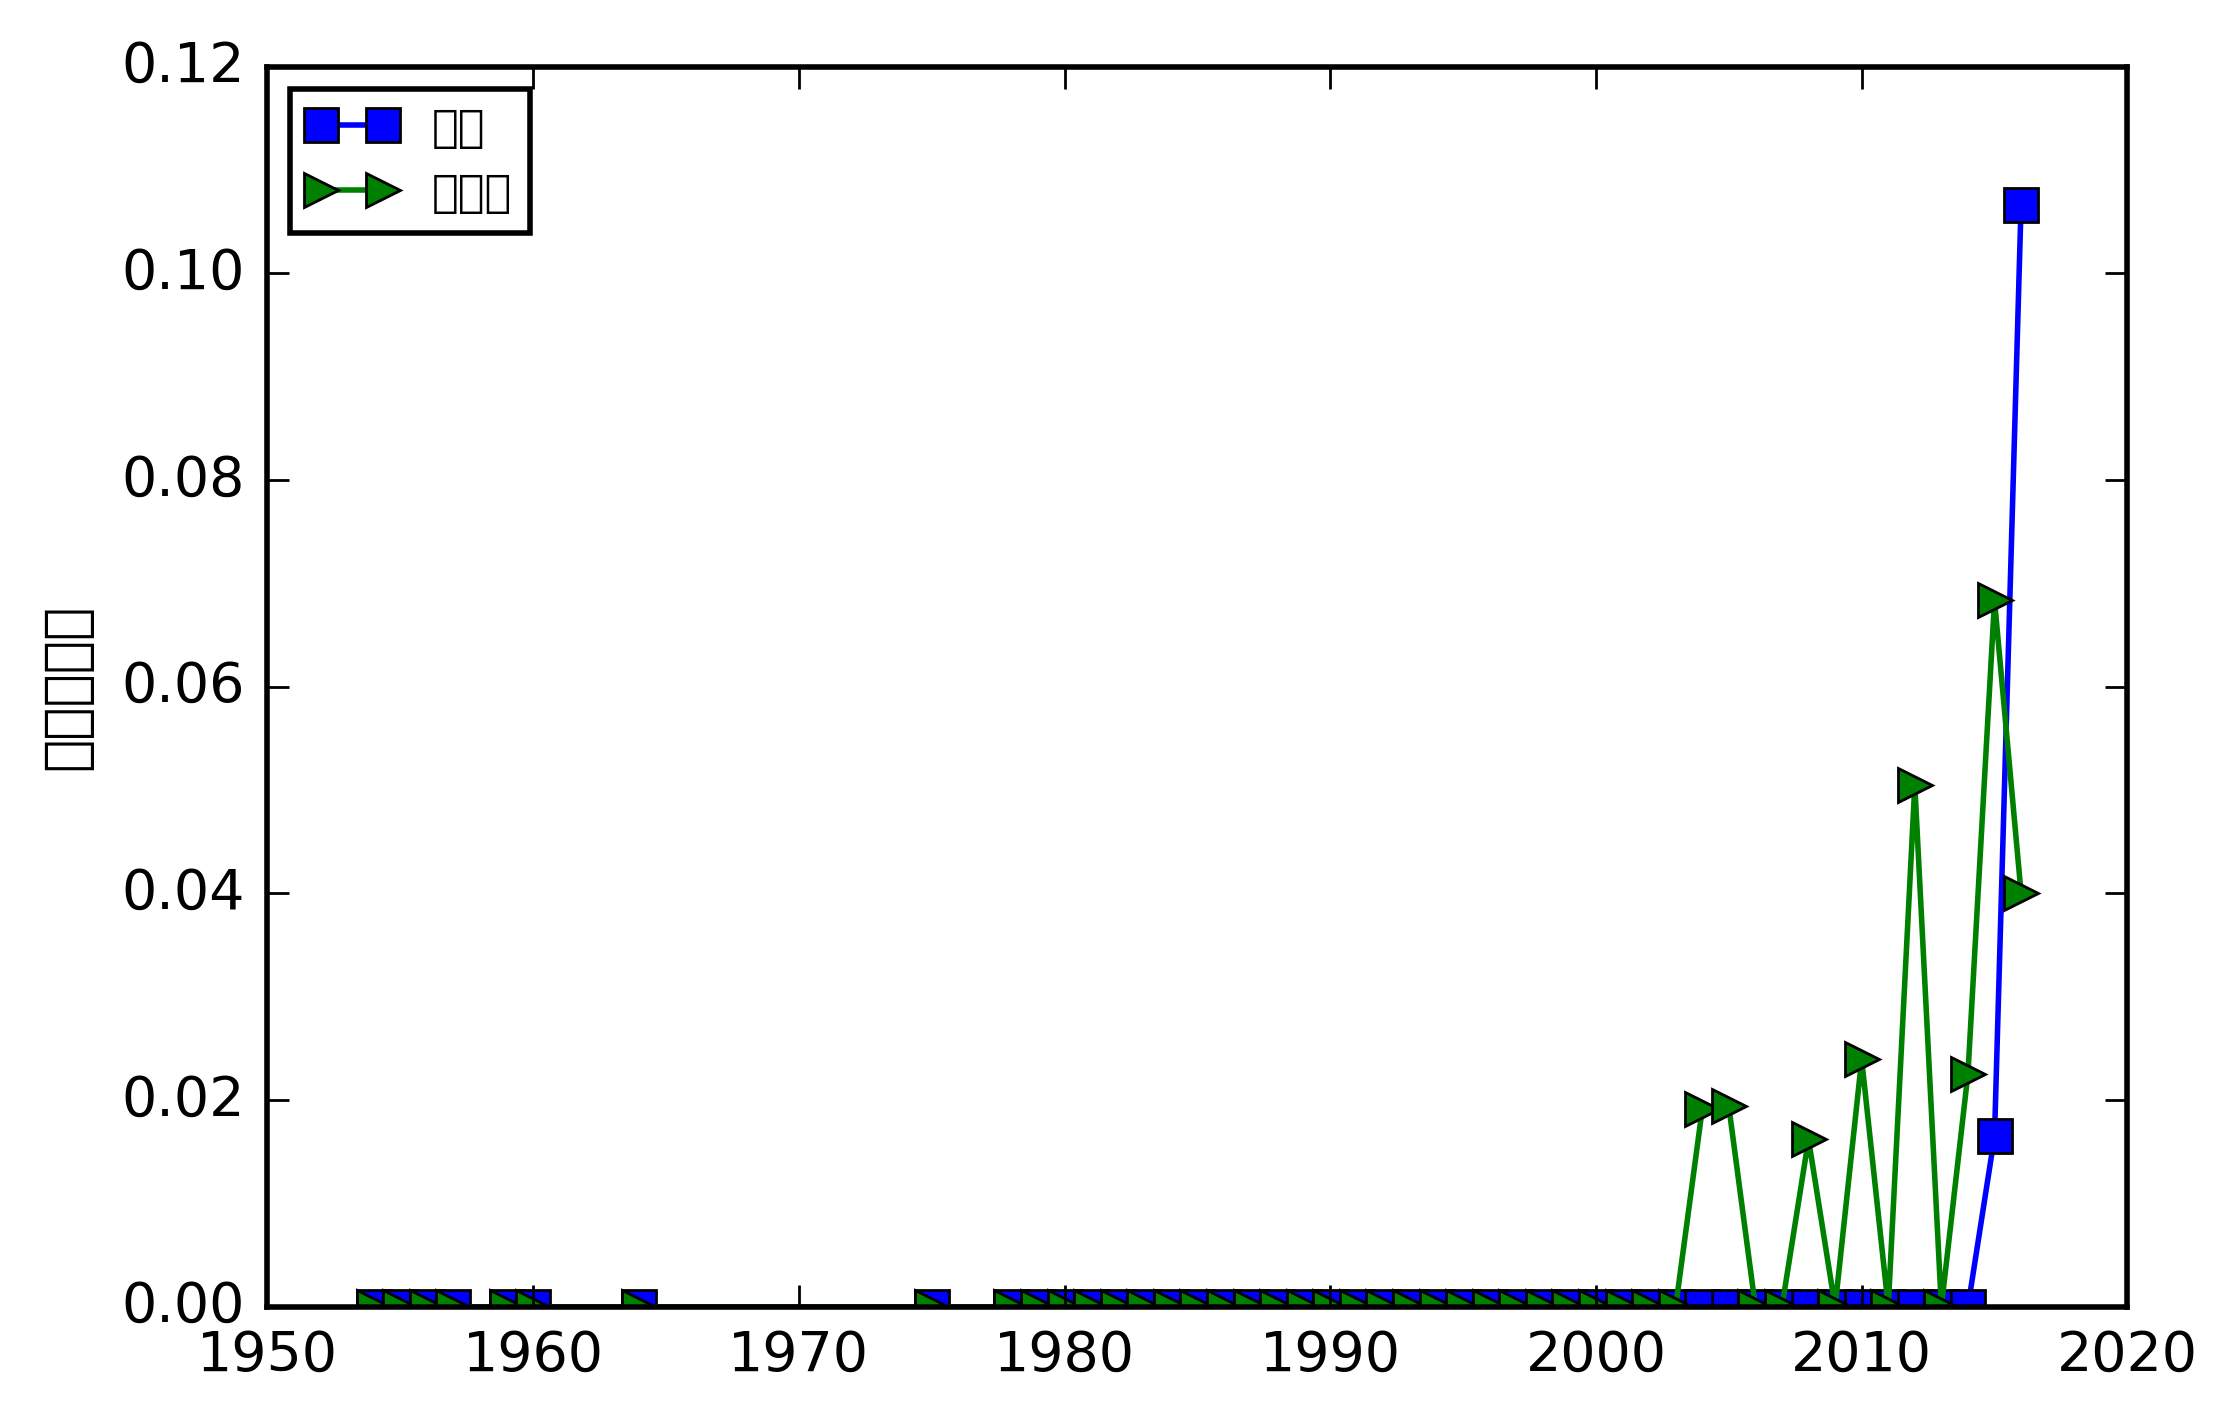

In [34]:

plotEvolution(u'动能', 'b', '-', 's')
plotEvolution(u'互联网', 'g', '-', '>')

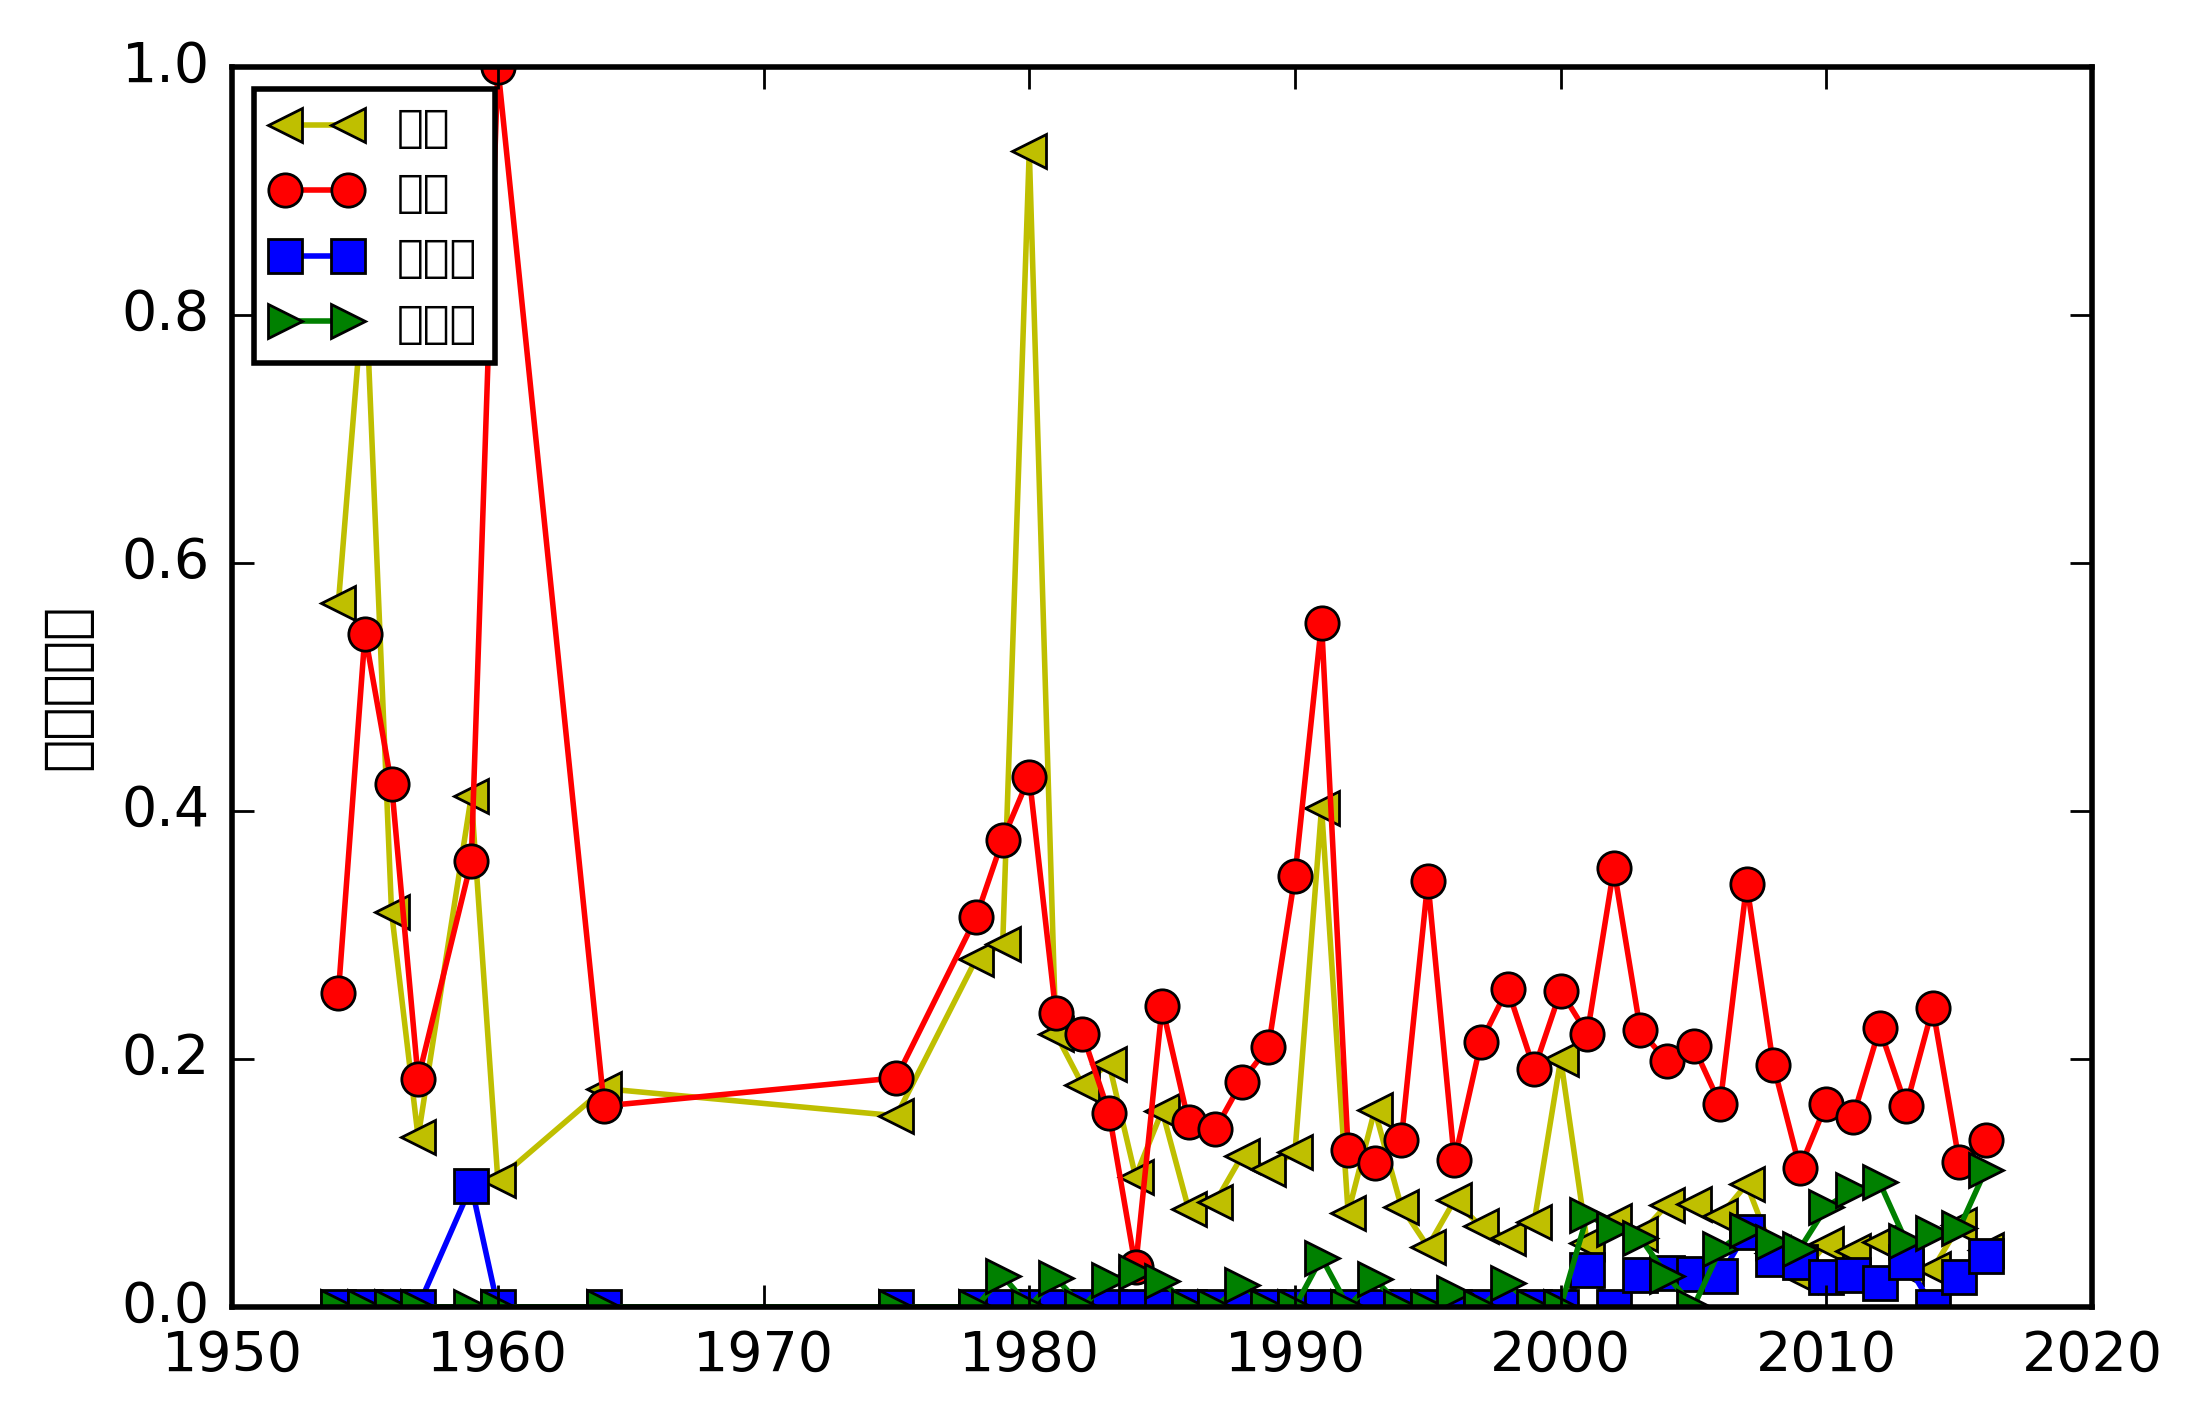

In [35]:
plotEvolution(u'工业', 'y', '-', '<')
plotEvolution(u'农业', 'r', '-', 'o')
plotEvolution(u'制造业', 'b', '-', 's')
plotEvolution(u'服务业', 'g', '-', '>')

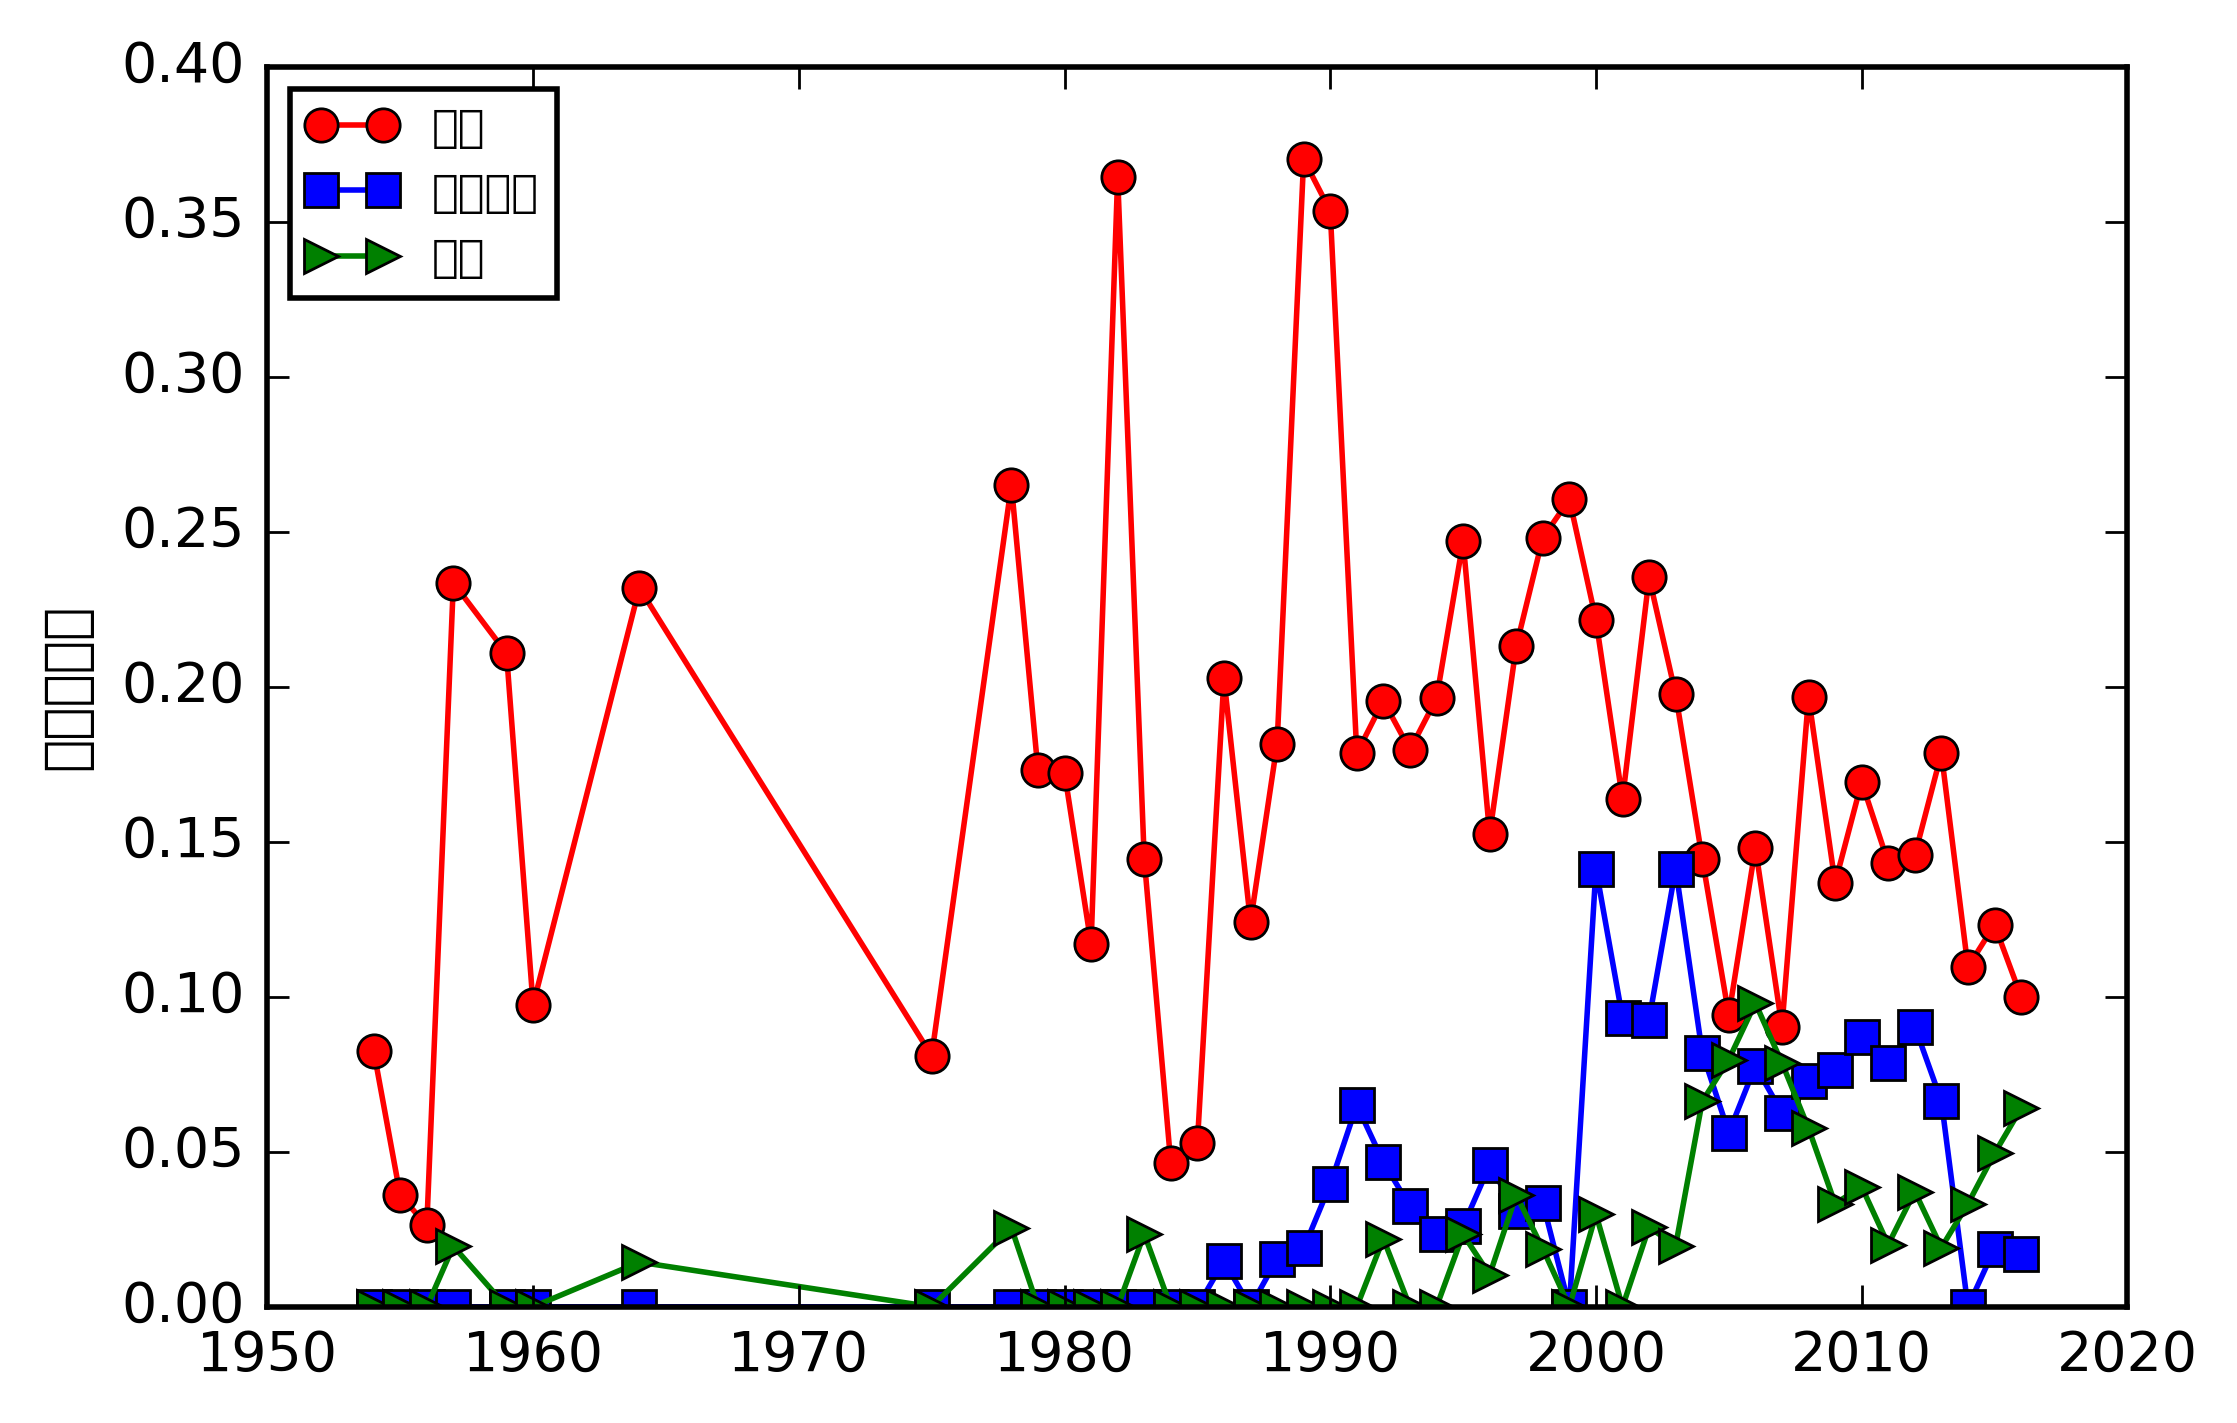

In [36]:
plotEvolution(u'教育', 'r', '-', 'o')
plotEvolution(u'社会保障', 'b', '-', 's')
plotEvolution(u'医疗', 'g', '-', '>')

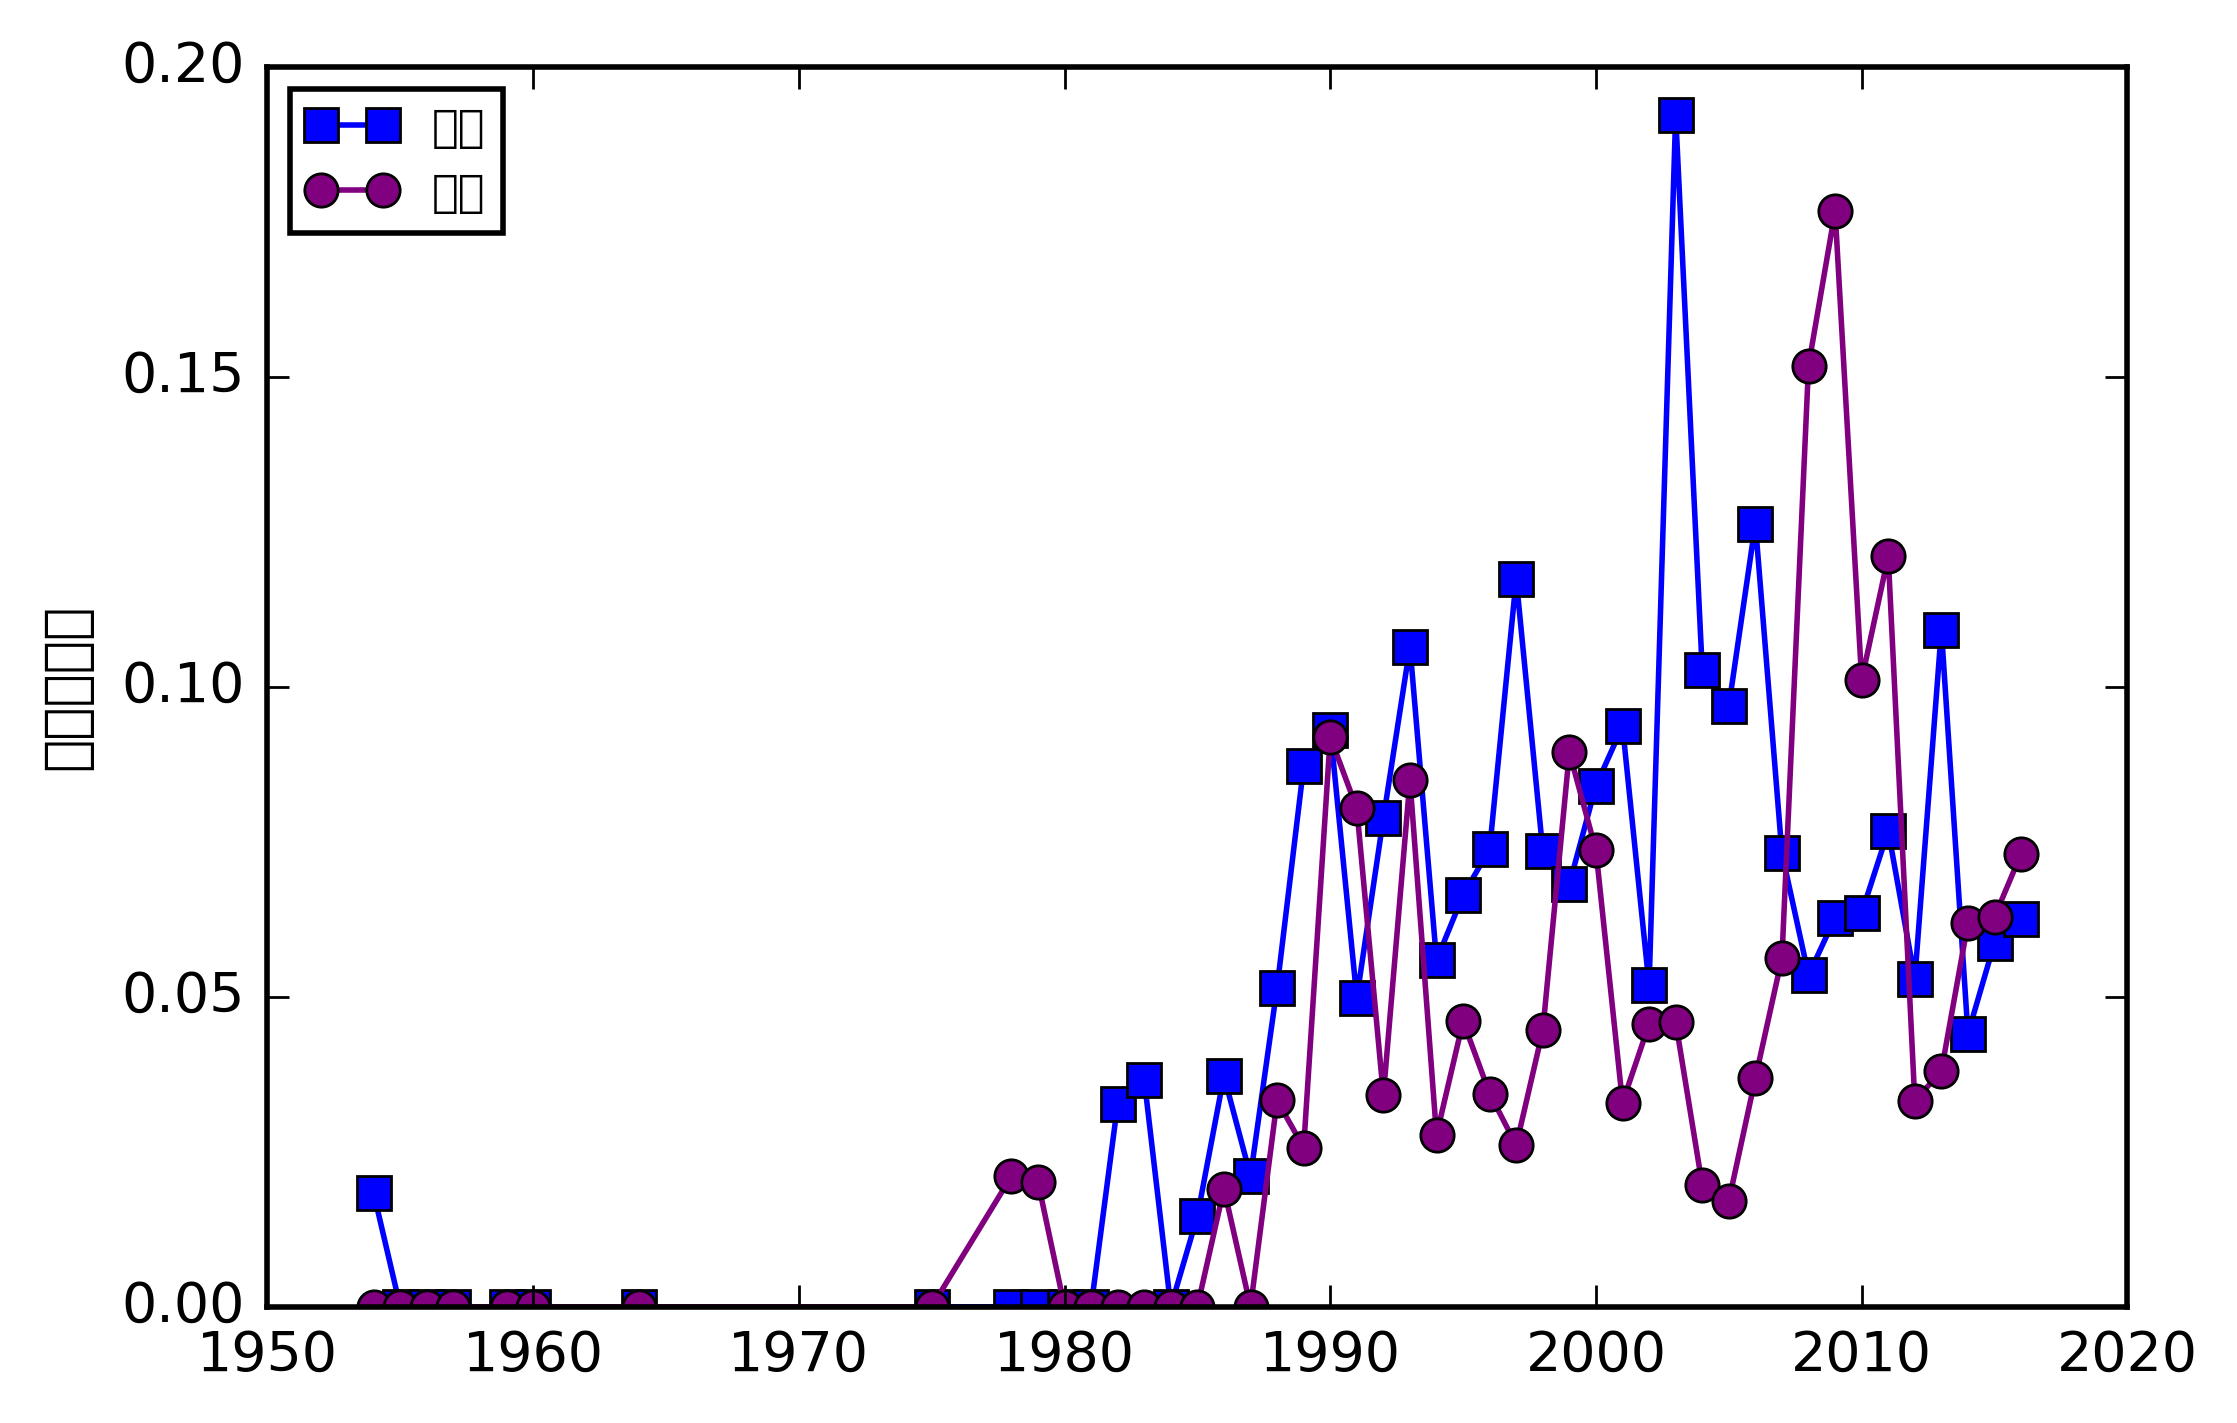

In [37]:

plotEvolution(u'环境', 'b', '-', 's')
plotEvolution(u'住房', 'purple', '-', 'o')

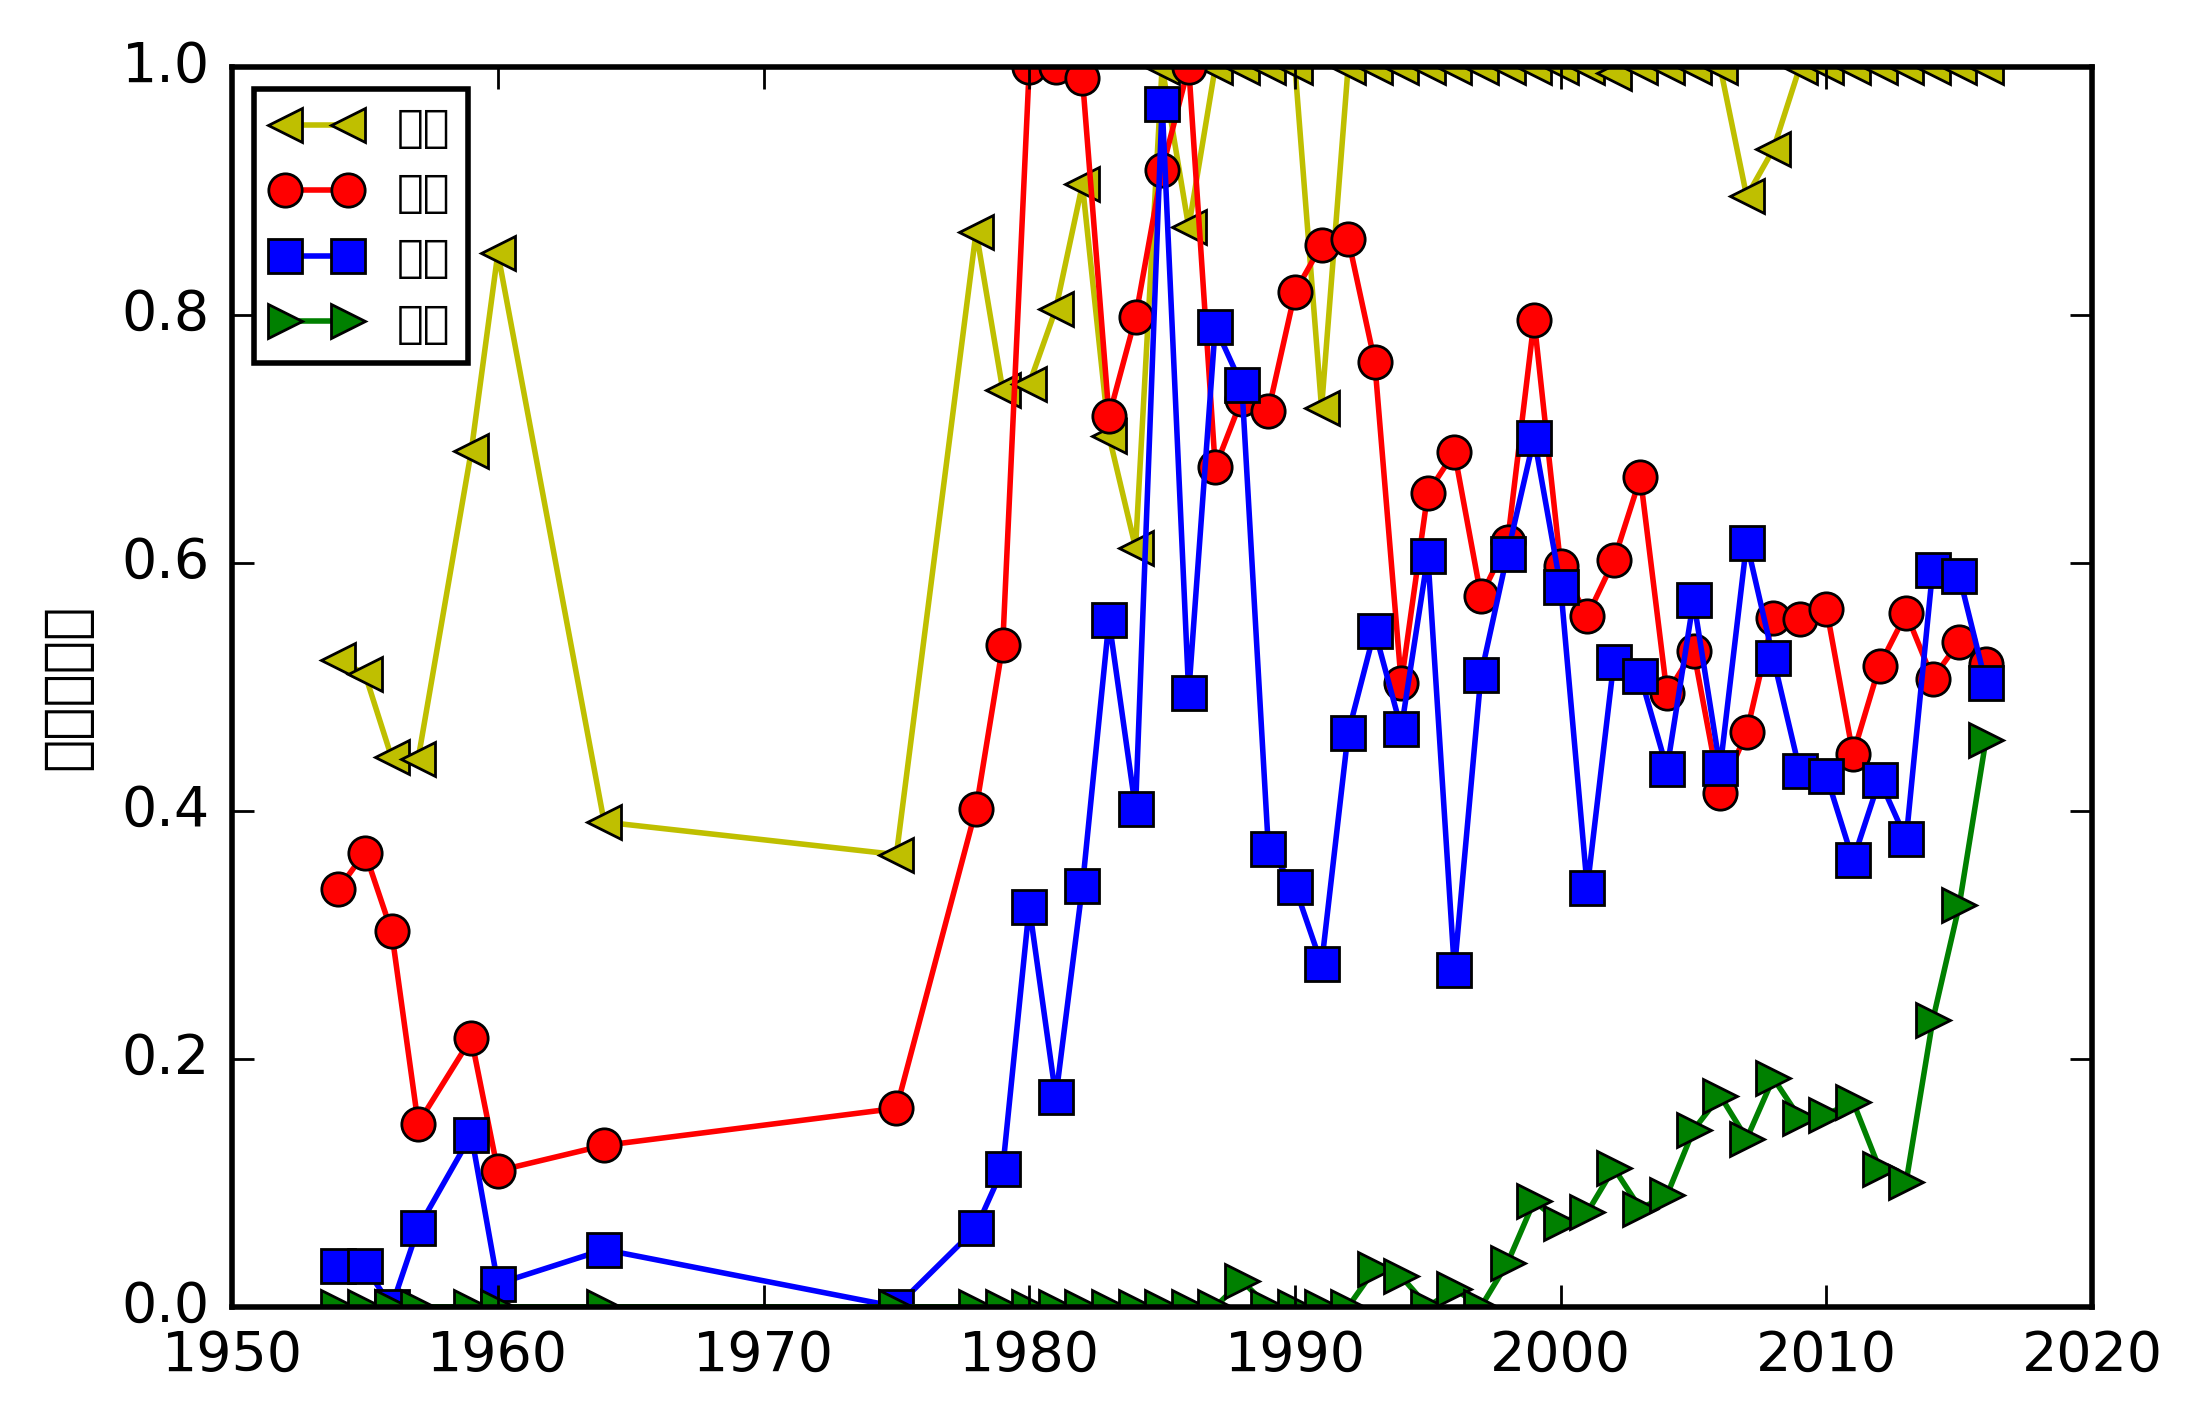

In [38]:
plotEvolution(u'发展', 'y', '-', '<')
plotEvolution(u'经济', 'r', '-', 'o')
plotEvolution(u'改革', 'b', '-', 's')
plotEvolution(u'创新', 'g', '-', '>')

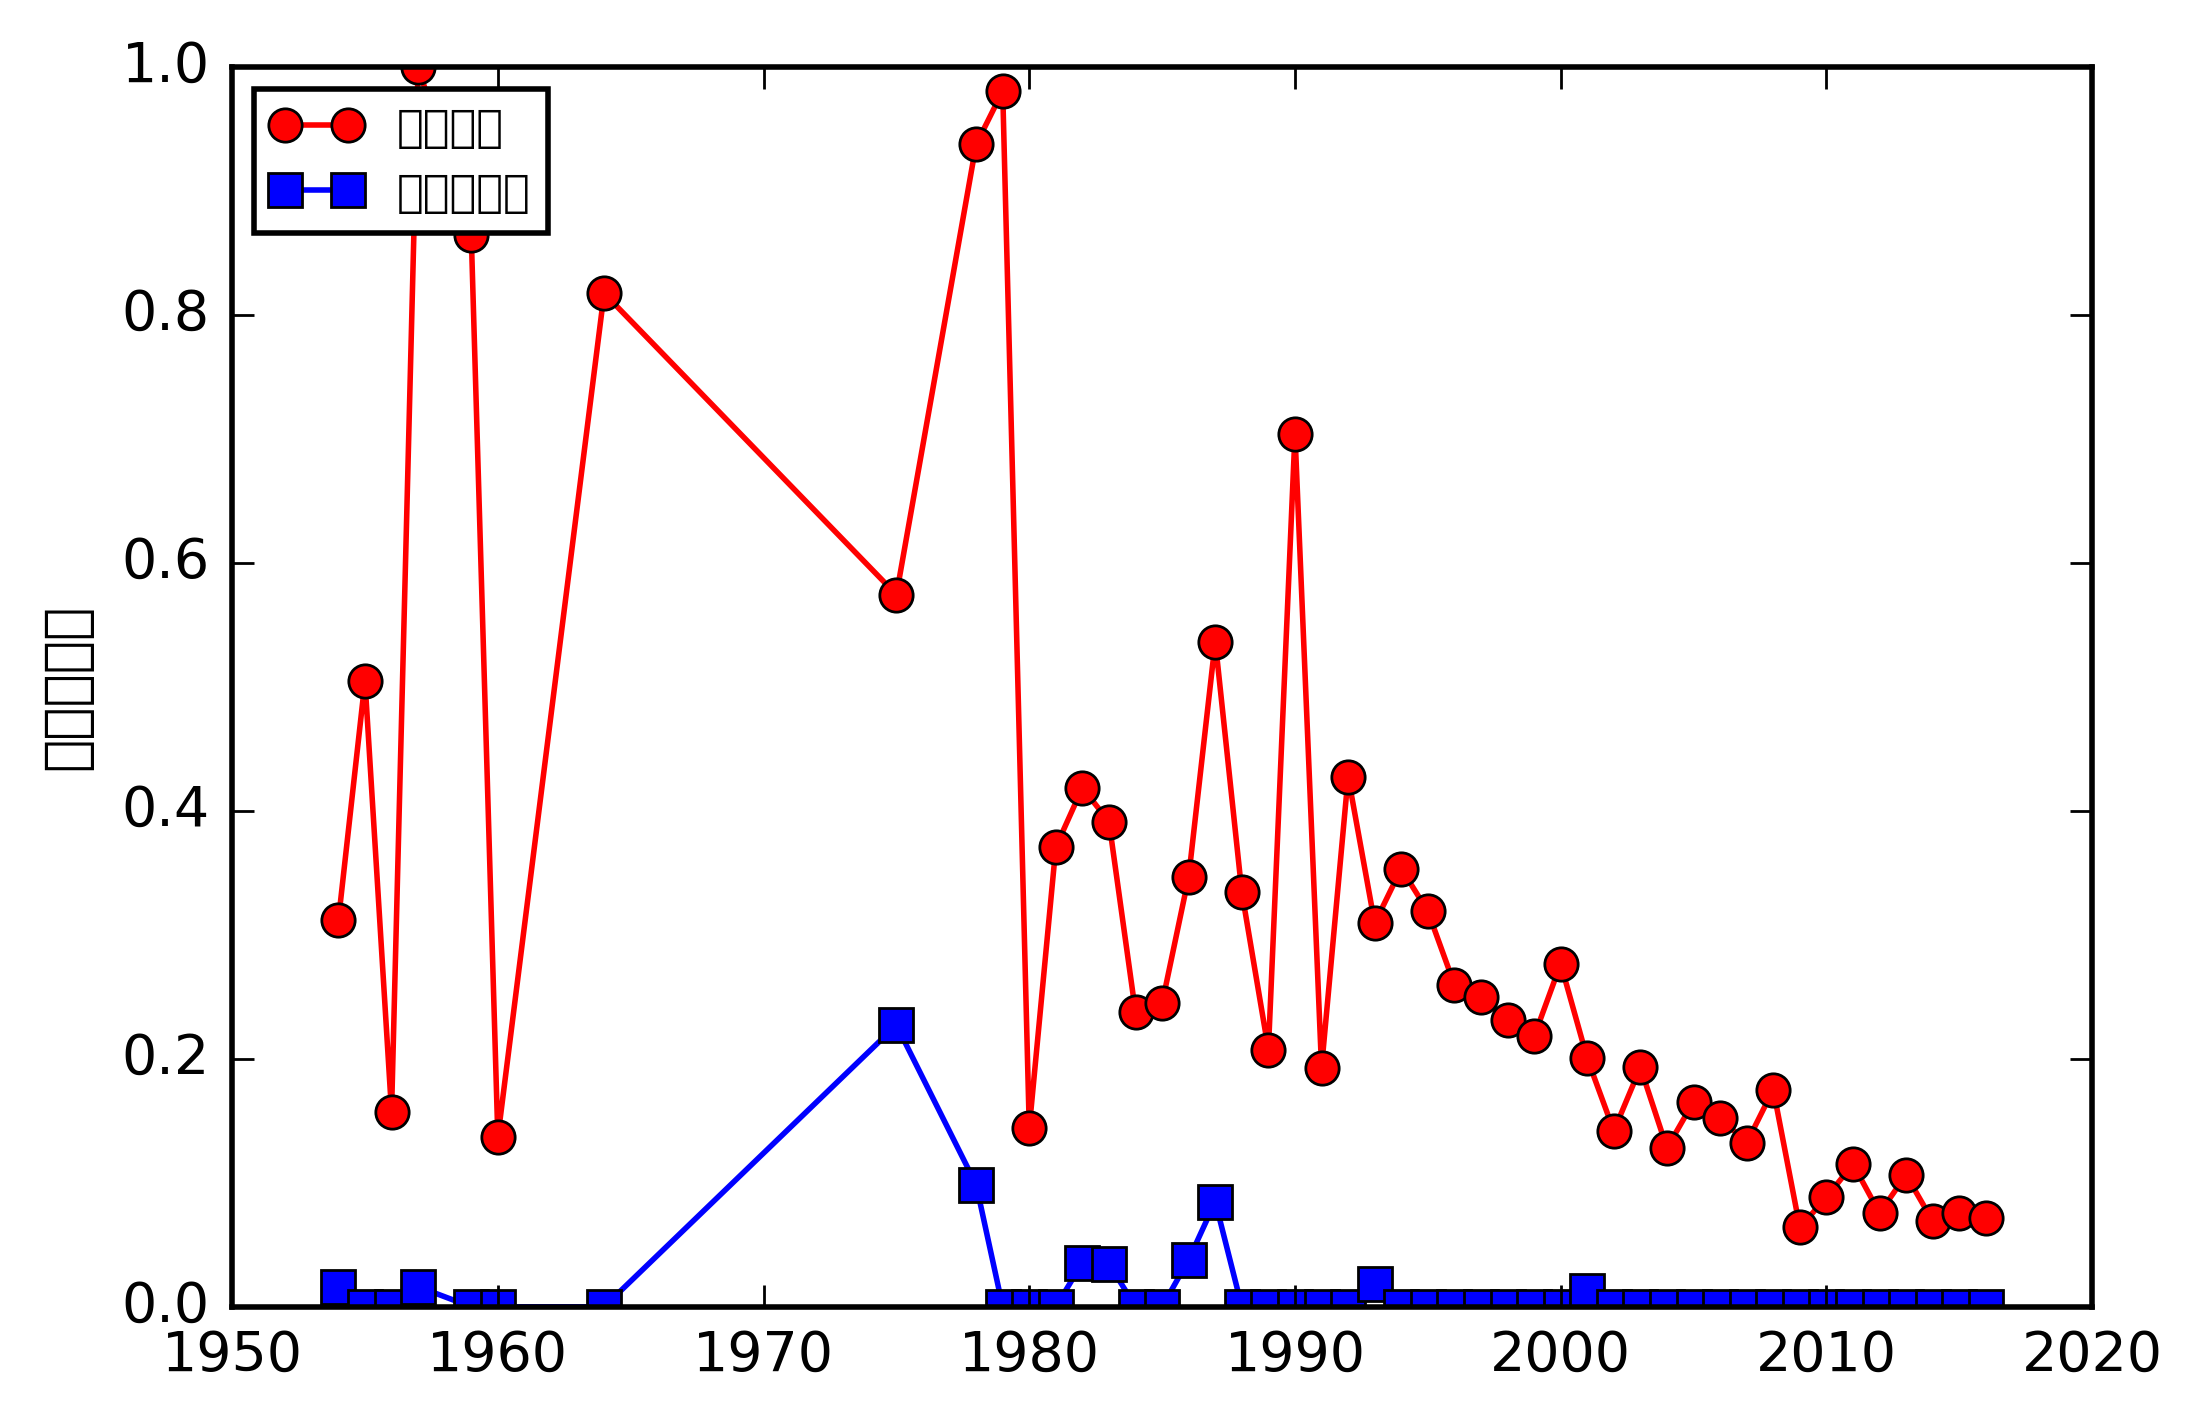

In [39]:
plotEvolution(u'社会主义', 'r', '-', 'o')
plotEvolution(u'马克思主义', 'b', '-', 's')

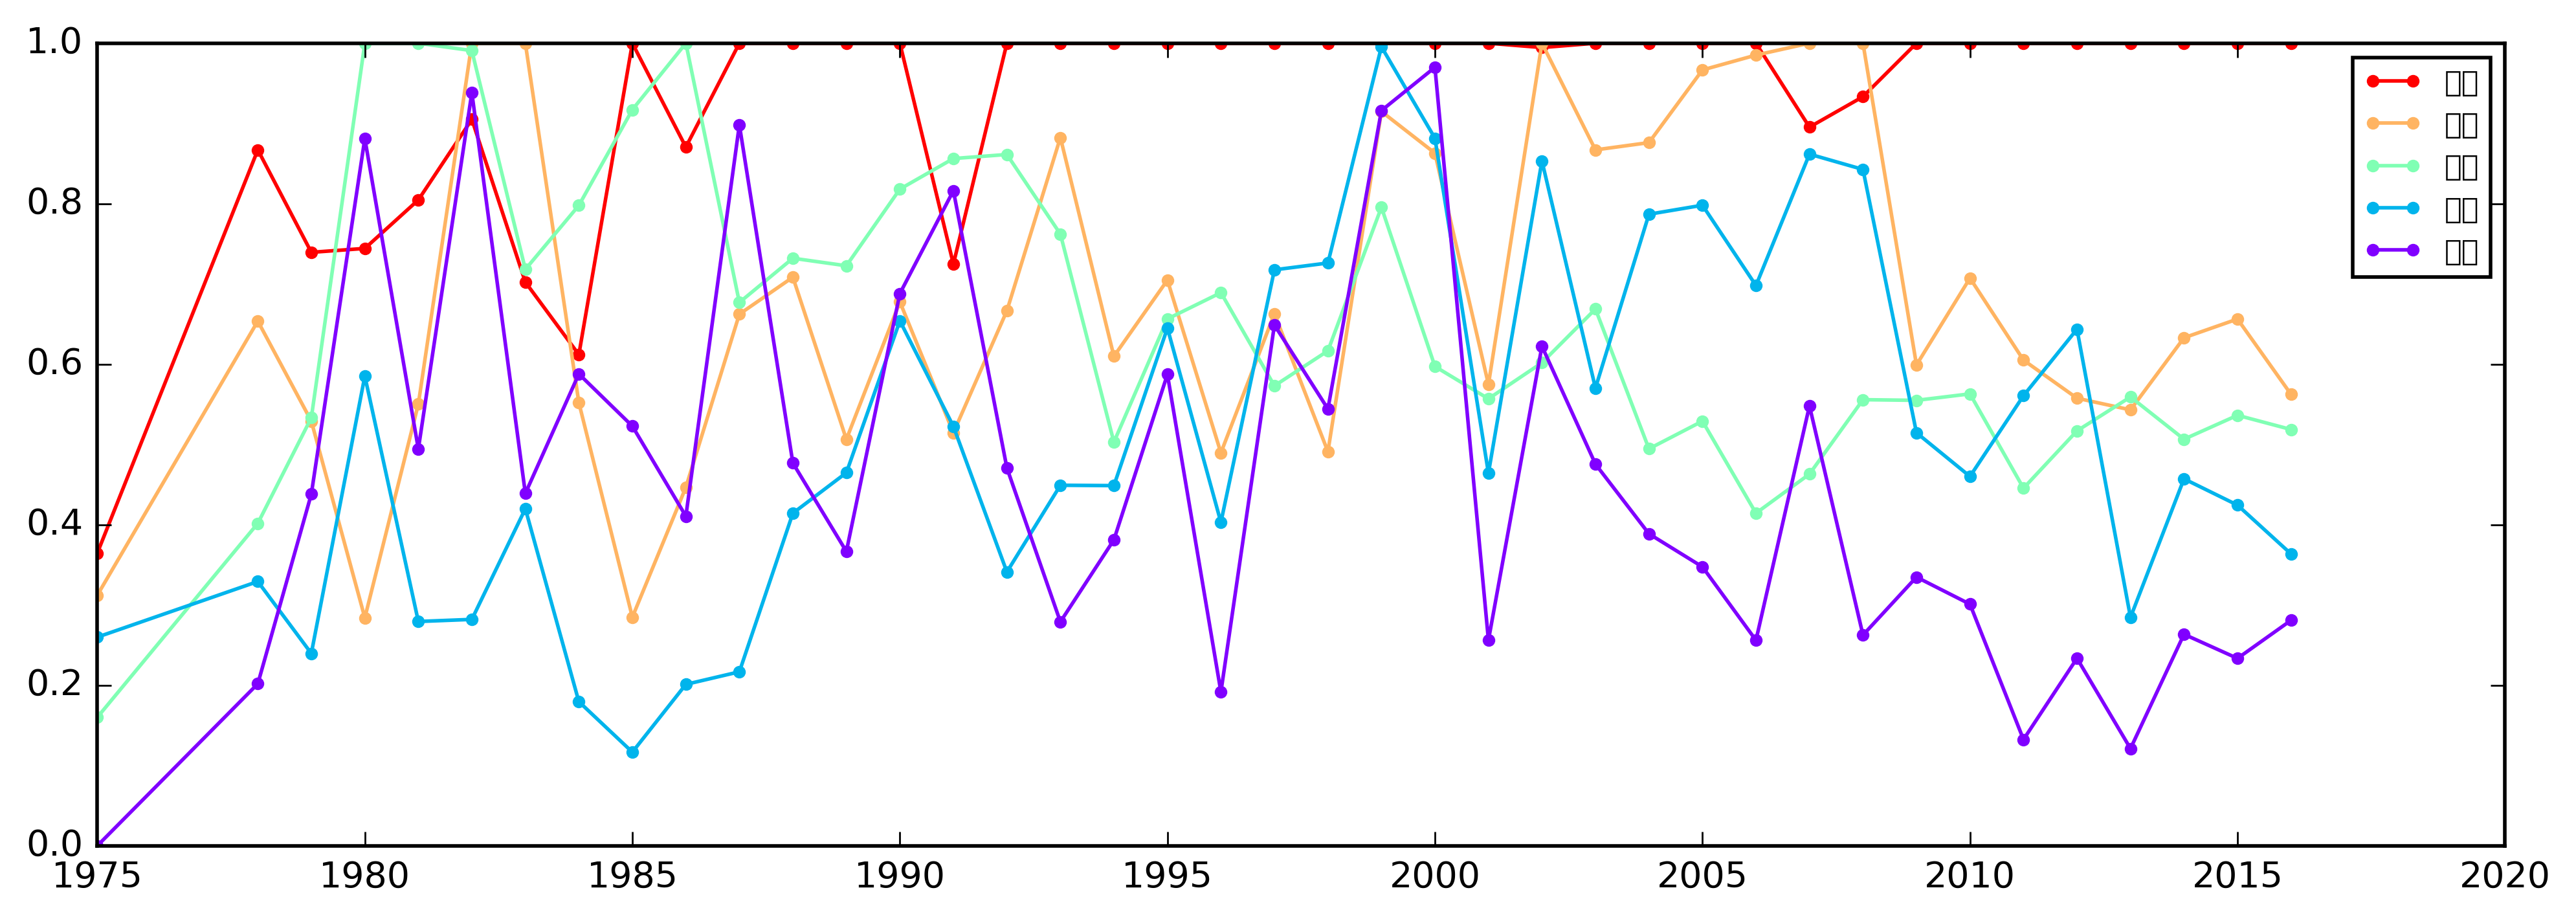

In [40]:

fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in enumerate(top50[:5]):
    years = data[word].keys()[-40:]
    tfidfs = data[word].values()[-40:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

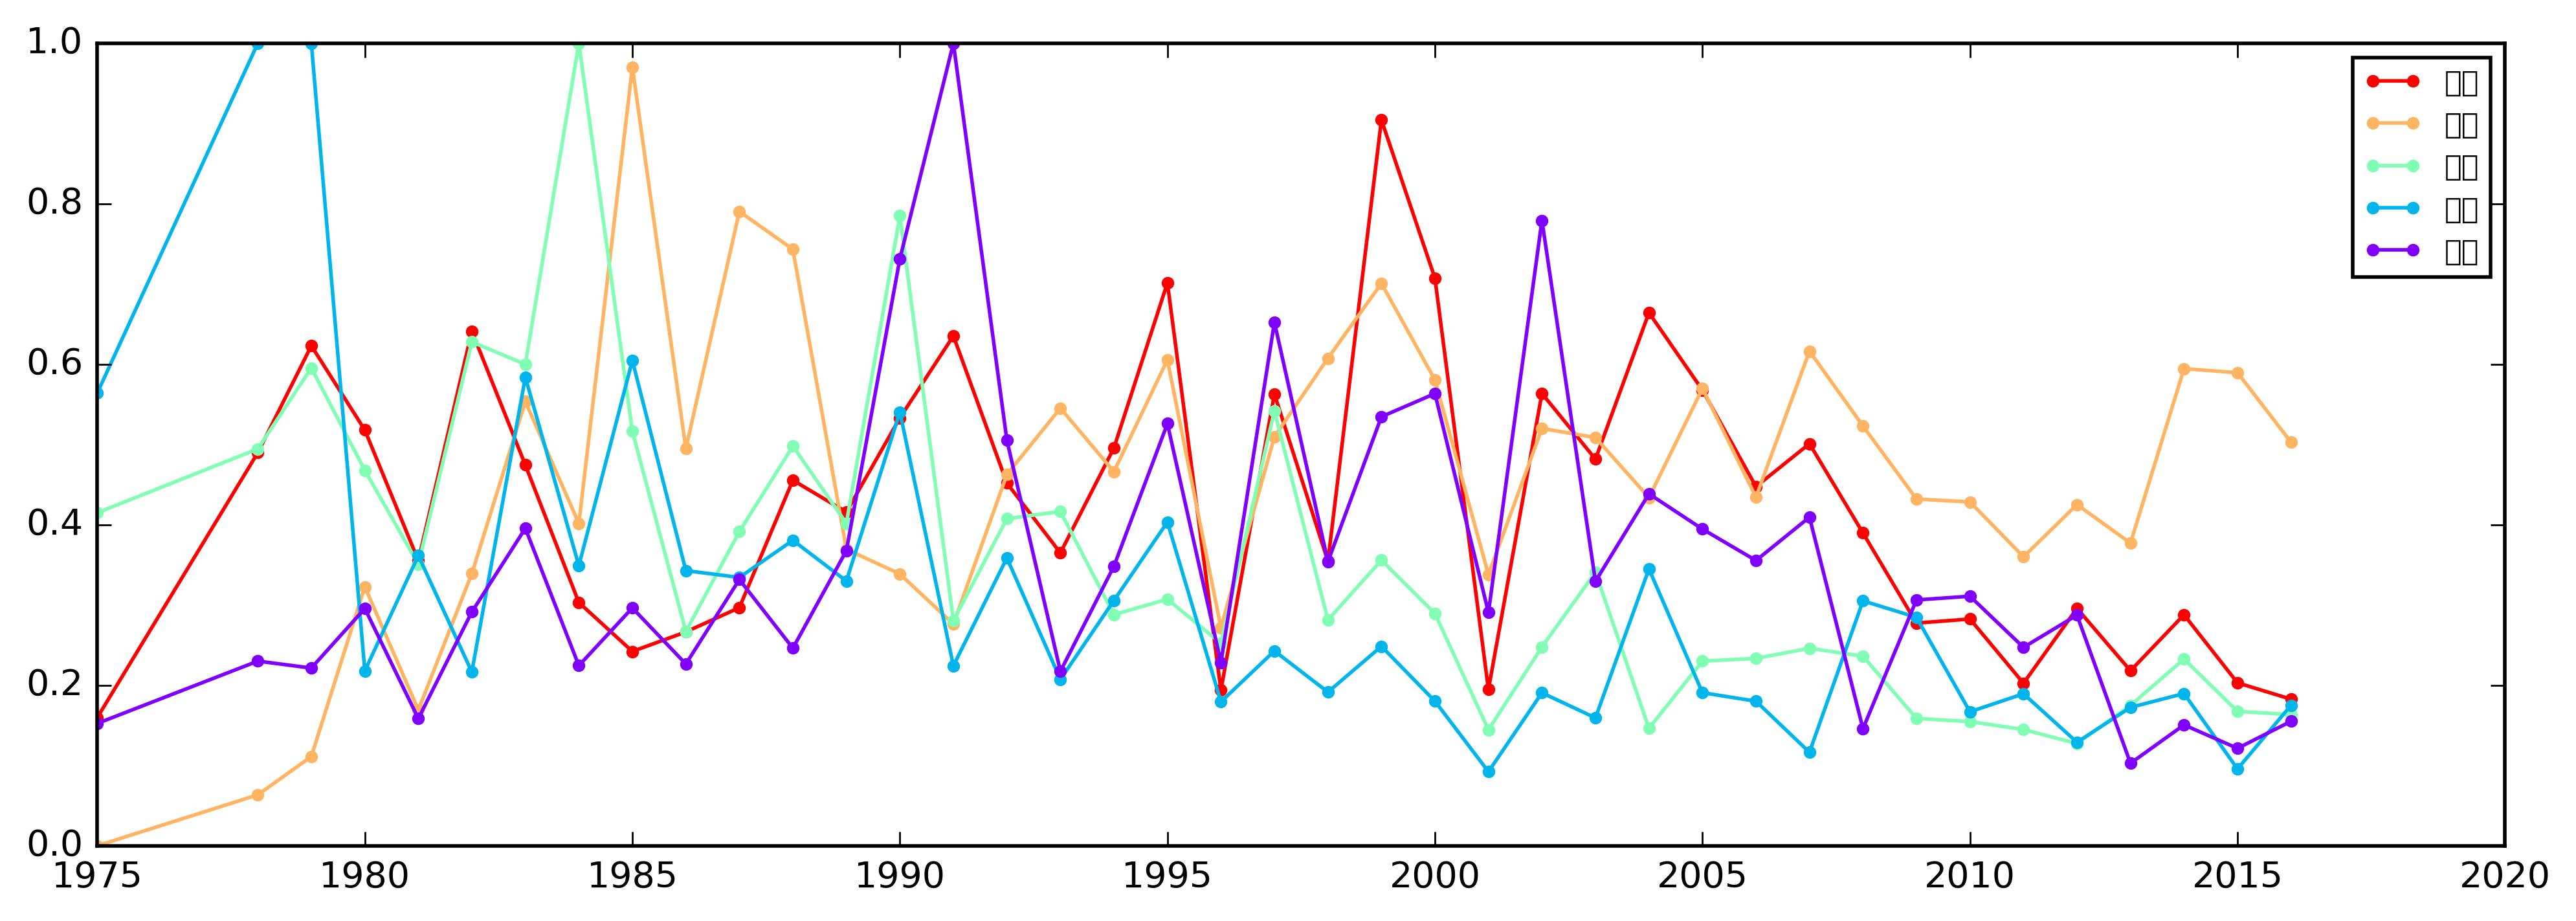

In [41]:

fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',5)

for k, word in enumerate(top50[5:10]):
    years = data[word].keys()[-40:]
    tfidfs = data[word].values()[-40:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

In [42]:

from sklearn import metrics
from sklearn.metrics import pairwise_distances
dataX = []
wordX = []
for word in top50:
    dataX.append(data[word].values()[-40:])
    wordX.append(word)
dataX = np.array(dataX)

In [43]:
dataX


array([[ 0.36469109,  0.86713375,  0.7394574 , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.31221238,  0.65375465,  0.52910343, ...,  0.63299341,
         0.6563227 ,  0.56251624],
       [ 0.16004713,  0.40180724,  0.53333081, ...,  0.506591  ,
         0.53641292,  0.51870343],
       ..., 
       [ 0.09299669,  0.20133884,  0.10954325, ...,  0.178822  ,
         0.15180402,  0.1214535 ],
       [ 0.04211826,  0.11809088,  0.24676705, ...,  0.05457496,
         0.03669857,  0.03780503],
       [ 0.12809655,  0.32405048,  0.22293145, ...,  0.09914296,
         0.09119663,  0.11760352]])

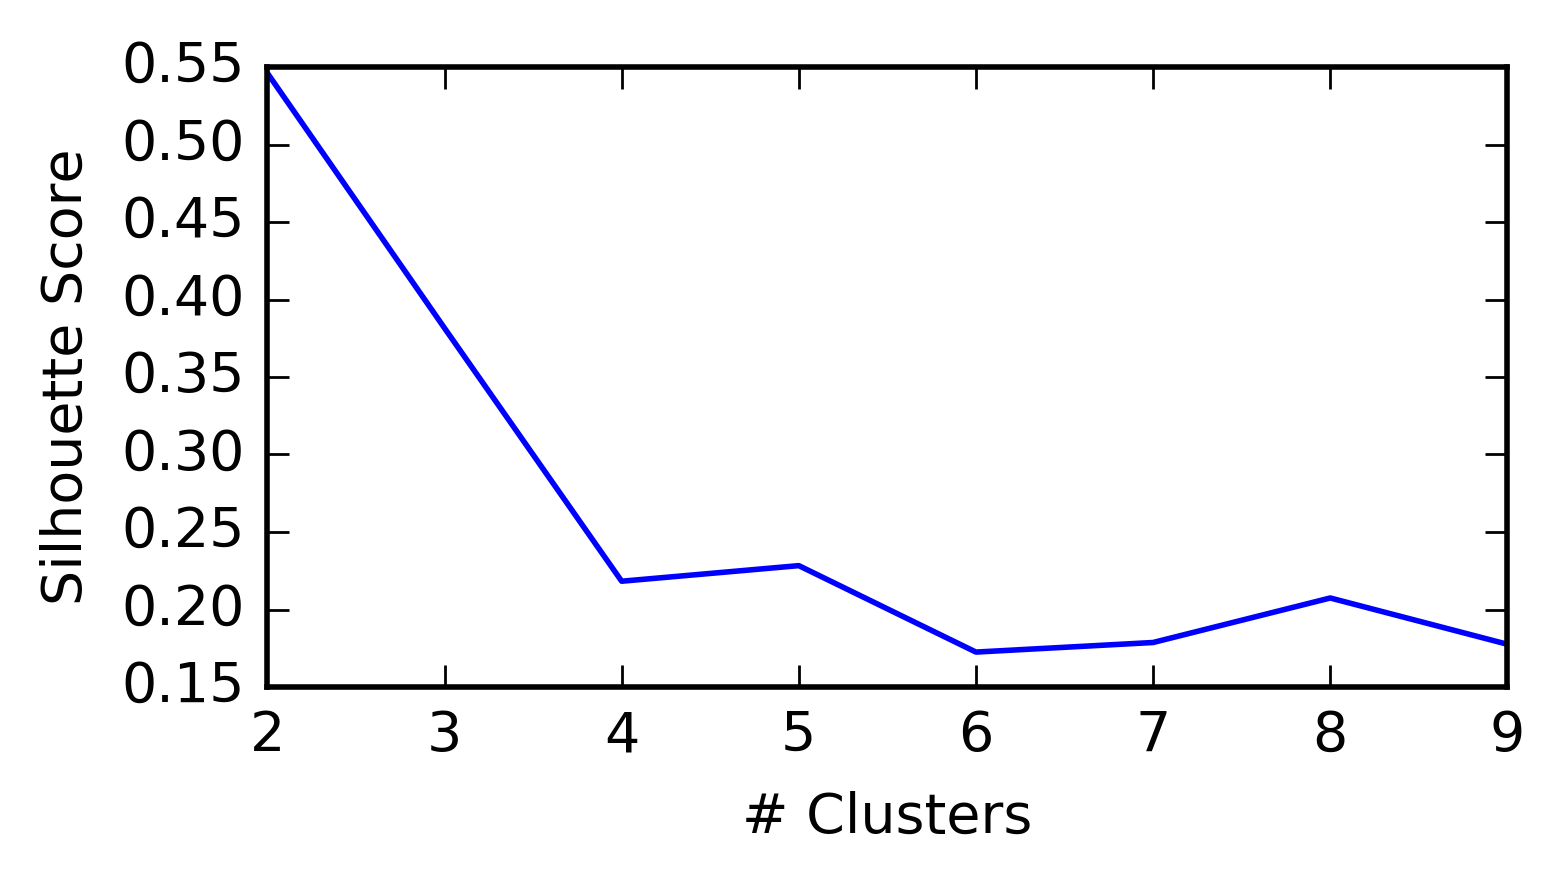

In [44]:
import numpy as np
from sklearn.cluster import KMeans
silhouette_score = []
for cluster_num in range(2, 10):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=1).fit(dataX)
    labels = kmeans_model.labels_
    sscore = metrics.silhouette_score(dataX, labels, metric='euclidean')
    silhouette_score.append(sscore)

fig = plt.figure(figsize=(4, 2),facecolor='white')    
plt.plot(range(2, 10), silhouette_score)
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [45]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(dataX)
labels = kmeans_model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [46]:
print ' '.join(wordX)


发展 建设 经济 加强 企业 工作 改革 国家 人民 继续 社会主义 提高 社会 生产 农业 政府 制度 增加 推进 问题 促进 增长 方面 农村 管理 加快 进行 重点 坚持 全国 教育 投资 市场 工业 地区 完善 计划 实行 支持 政策 生活 中国 文化 扩大 实现 基本 改善 建立 技术 群众


In [47]:
print '\t'.join([wordX[index] for index in np.where(labels==0)[0]])


国家	人民	继续	社会主义	提高	社会	生产	农业	政府	制度	增加	推进	问题	促进	增长	方面	农村	管理	加快	进行	重点	坚持	全国	教育	投资	市场	工业	地区	完善	计划	实行	支持	政策	生活	中国	文化	扩大	实现	基本	改善	建立	技术	群众


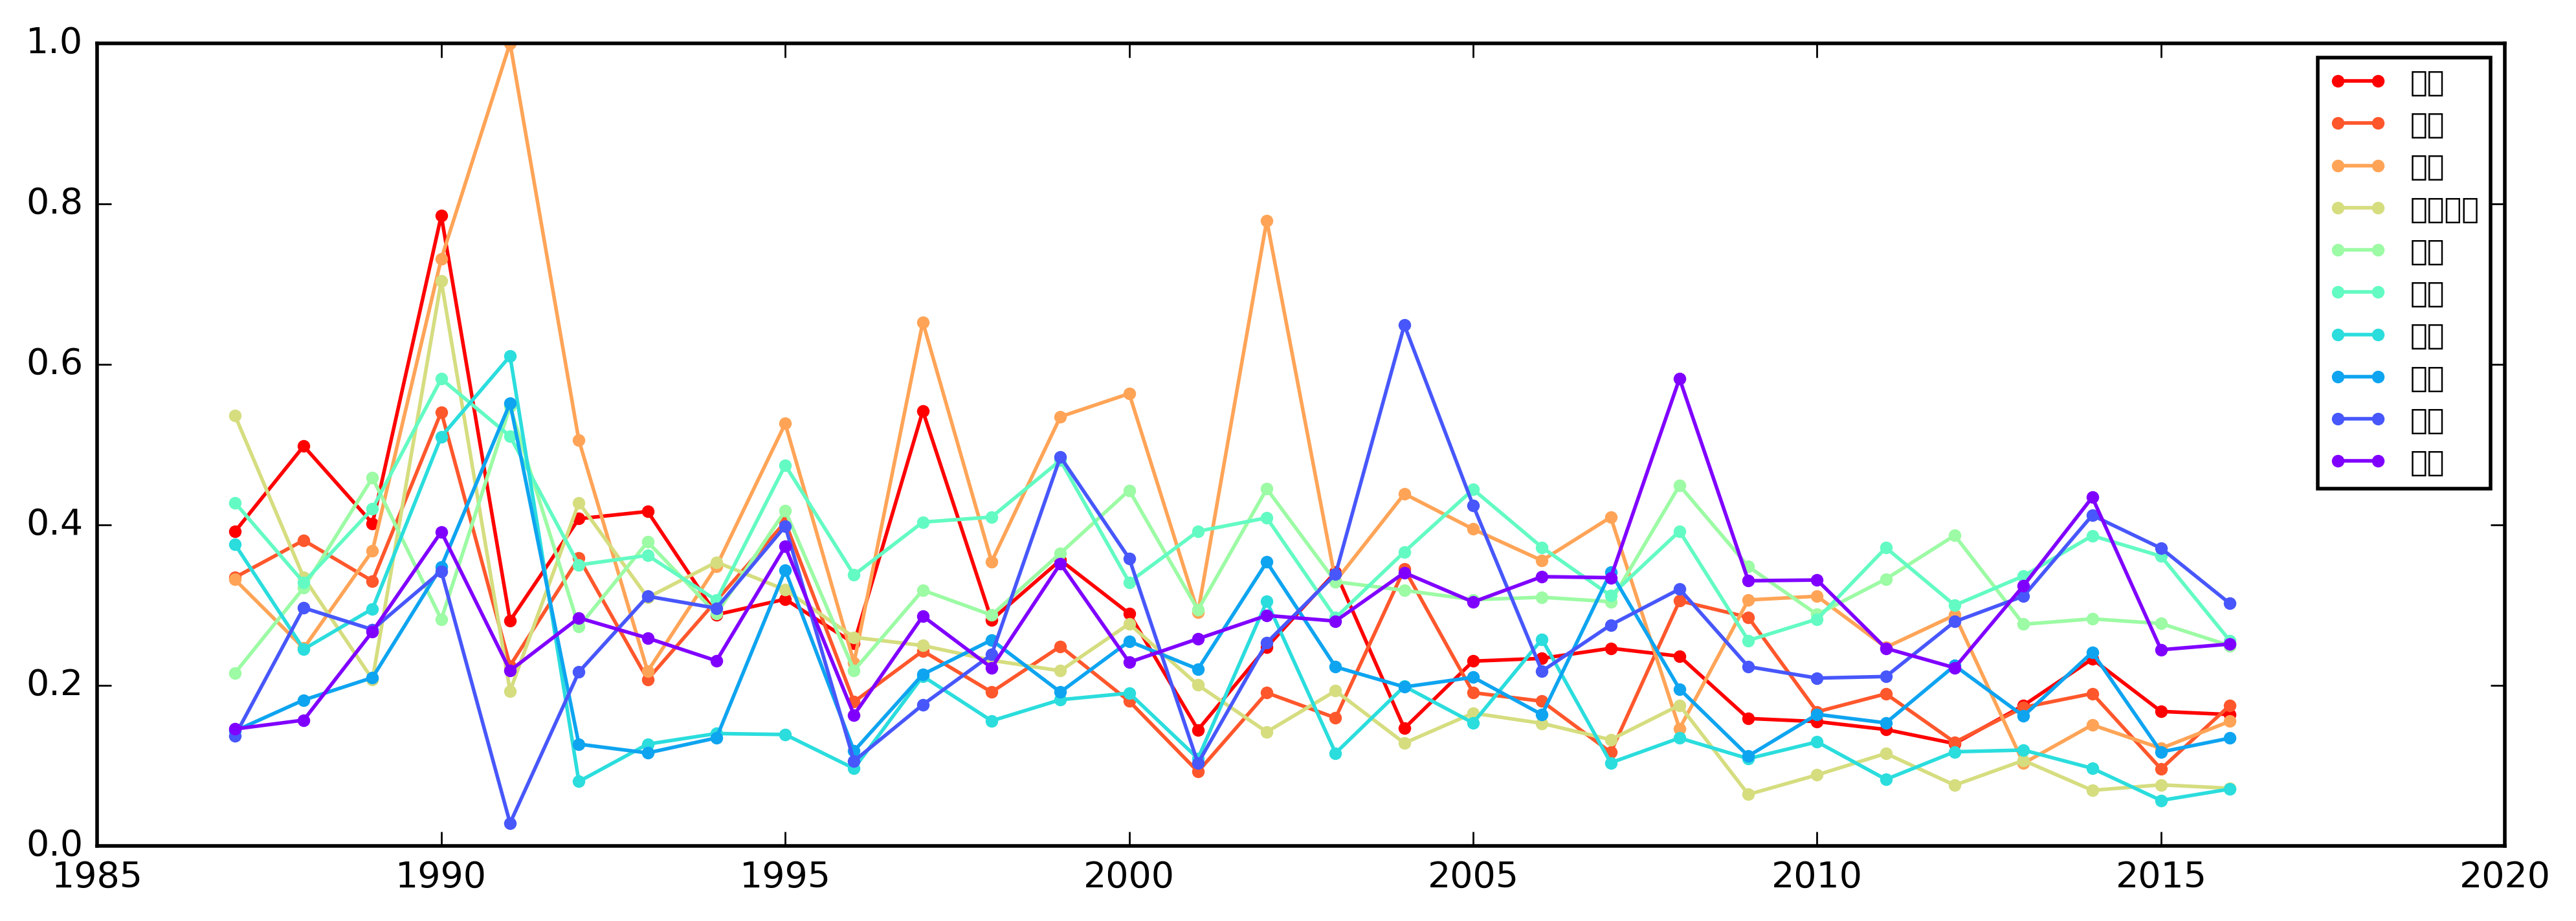

In [48]:
word_cluster1 = [wordX[index] for index in np.where(labels==0)[0]]

fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',10)

for k, word in  enumerate(word_cluster1[:10]):
    years = data[word].keys()[-30:]
    tfidfs = data[word].values()[-30:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()

In [49]:
print '\t'.join([wordX[index] for index in np.where(labels==1)[0]])


发展	建设	经济	加强	企业	工作	改革


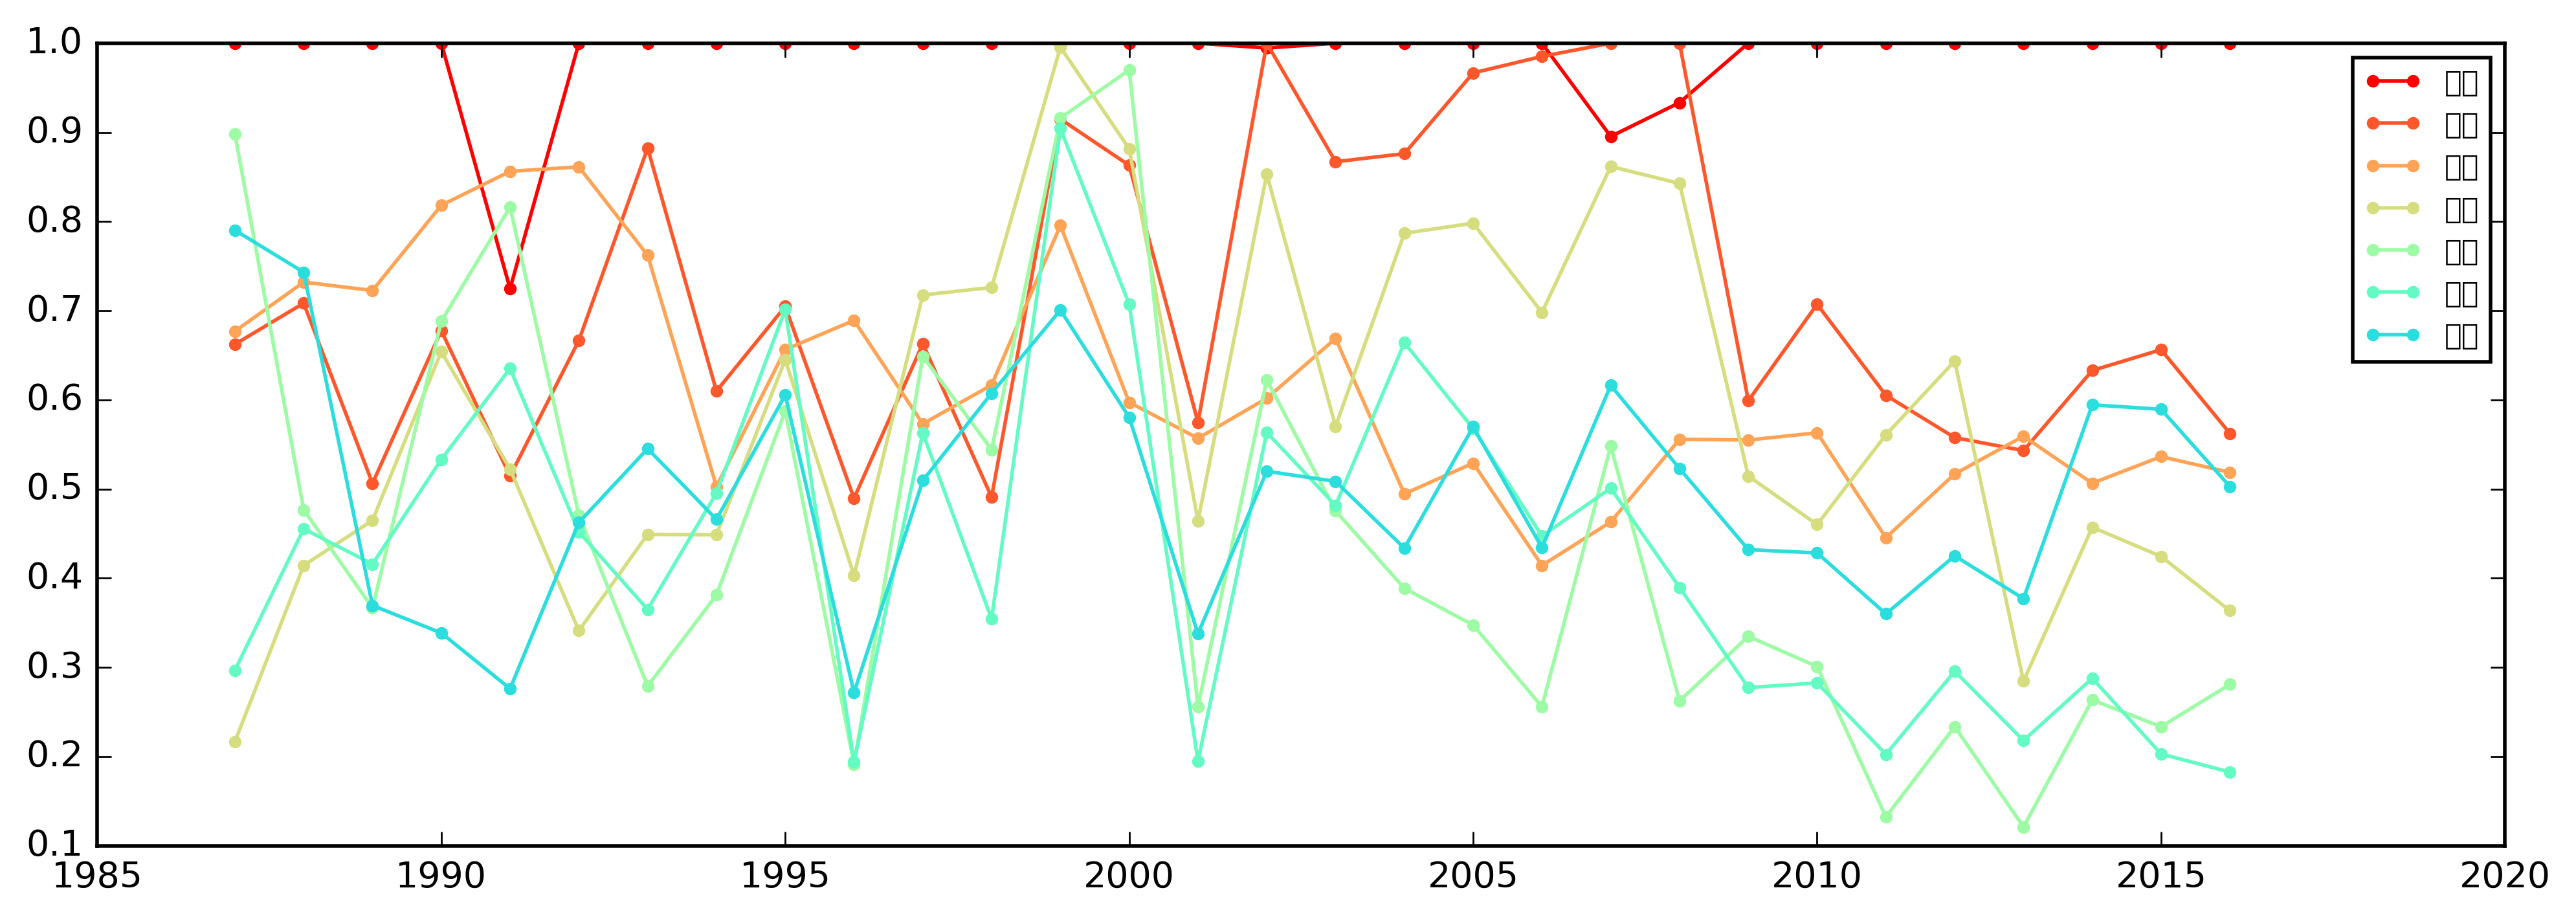

In [50]:
word_cluster2 = [wordX[index] for index in np.where(labels==1)[0]]

fig = plt.figure(figsize=(12, 4),facecolor='white')
cmap = cm.get_cmap('rainbow_r',10)

for k, word in  enumerate(word_cluster2[:10]):
    years = data[word].keys()[-30:]
    tfidfs = data[word].values()[-30:]
    plt.plot(years, tfidfs, color=cmap(k), linestyle='-',marker='.',label= word)
plt.legend(loc=1,fontsize=8)
plt.show()